### Introduction

<b>Churn prediction</b> is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel a subscription to a service. 

This project is a binary classification problem. If we focus on company goals, actually our problem is losing customers. In this situation the company needs to find churned customer in other words the customers that we will lose. Thus, the company will avoid losing profit and revenue.

### Loading data
We have a dataset with 51047 rows, 58 columns in `cell2celltrain.csv`

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('cell2celltrain.csv')

In [3]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
train.shape

(51047, 58)

### Data Analysis and Preprocessing

In [5]:
train.drop(['CustomerID'], axis=1, inplace=True)

In [6]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
OHIRAV330            1
OMANEW515            1
KCYHES316            1
AIRGEO843            1
NCRDNN910            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

In [7]:
for i in train.columns:
      if train[i].dtype=='float':
            print(pd.DataFrame(train[i].value_counts()))

        MonthlyRevenue
29.99             1069
34.99              806
10.00              469
30.00              404
49.99              392
...                ...
118.03               1
230.65               1
194.90               1
119.77               1
109.96               1

[12665 rows x 1 columns]
        MonthlyMinutes
0.0                723
2.0                138
8.0                127
6.0                122
88.0               116
...                ...
2252.0               1
2391.0               1
3129.0               1
4578.0               1
2437.0               1

[2719 rows x 1 columns]
       TotalRecurringCharge
30.0                   7302
45.0                   6630
60.0                   4435
40.0                   4415
50.0                   4143
...                     ...
149.0                     1
302.0                     1
281.0                     1
207.0                     1
212.0                     1

[214 rows x 1 columns]
       DirectorAssistedCalls
0.00    

`AgeHH` stands for "Age of Head of Household" so it can not have a value of 0. If "0" appears in `AgeHH1, AgeHH2`, it could potentially indicate a null or missing value.

In [8]:
change_unknown2null = ["HandsetPrice", "MaritalStatus"]

train[change_unknown2null] = train[change_unknown2null].replace("Unknown", np.nan)

change_zero2unknown = ["AgeHH1", "AgeHH2"]
train[change_zero2unknown] = train[change_zero2unknown].replace(0.0, np.nan)

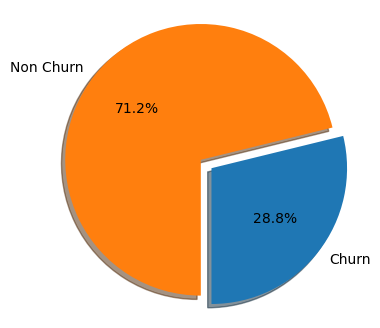

In [9]:
churn=train[train['Churn']== 'Yes'].shape[0]
non_churn = train[train['Churn'] == "No"].shape[0]

fig1, ax1 = plt.subplots(figsize = (4,4))
labels = ["Churn", "Non Churn"]

# explode create distance between 2 part of pie
ax1.pie([churn,non_churn], explode=[0.1, 0], labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

Customer churn is 28.8%. The data is unbalanced.

==> So when splitting data, we need to balance data


In [10]:
retention_offer=train[train['RetentionOffersAccepted']>0]

The number of customers who accepted the retention call offer : 881
Number of customers lost after accepting the retention call: 362
Number of customers not lost after accepting the retention call : 519
Success rate of the retention call proposal: 0.5891032917139614


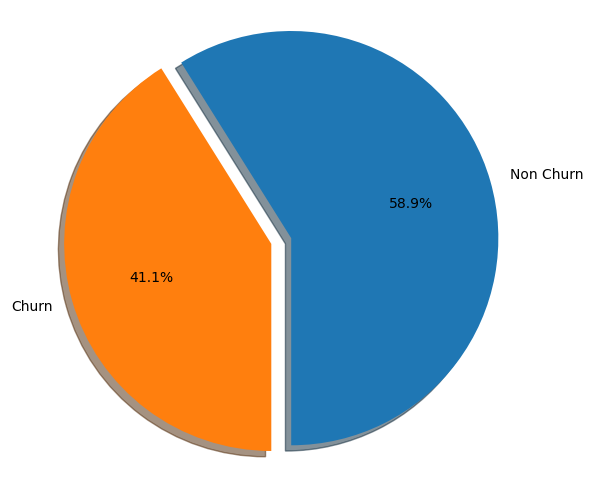

In [11]:
print("The number of customers who accepted the retention call offer : {}".format(retention_offer.shape[0]))
print("Number of customers lost after accepting the retention call: {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after accepting the retention call : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Success rate of the retention call proposal: {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

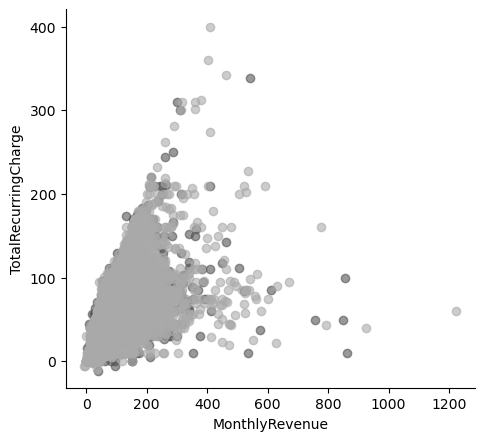

In [12]:
g = sns.PairGrid(train, y_vars=["TotalRecurringCharge"], x_vars=["MonthlyRevenue"], height=4.5, hue="Churn", aspect=1.1, palette="gray")
ax = g.map(plt.scatter, alpha=0.6)

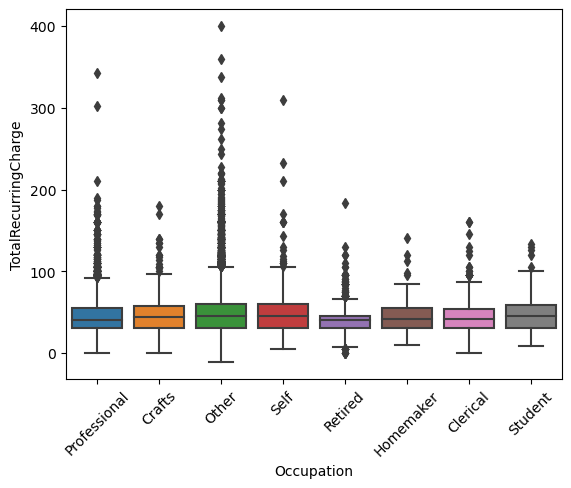

In [13]:
sns.boxplot(data = train, x = 'Occupation', y = 'TotalRecurringCharge')
plt.xticks(rotation=45)
plt.show()

Percentage of customer churn in each credit rating: 
2-High       30.074238
1-Highest    30.837831
3-Good       31.010702
5-Low        22.095707
4-Medium     26.115363
7-Lowest     28.949858
6-VeryLow    27.430556
Name: CreditRating, dtype: float64


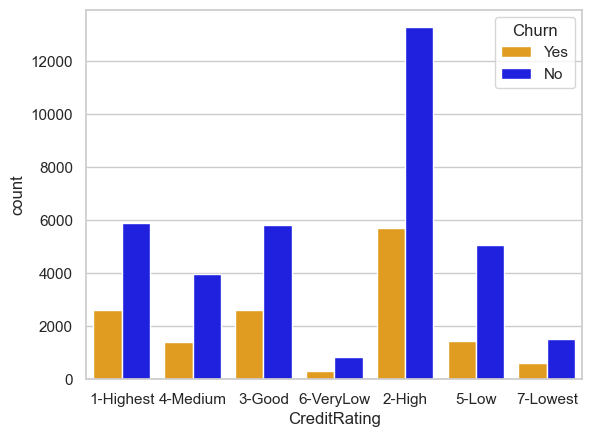

In [14]:
sns.set(style="whitegrid")
sns.countplot(data = train, x = "CreditRating", hue = "Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each credit rating: ")
print(train[train['Churn'] == 'Yes']['CreditRating'].value_counts()
      / train['CreditRating'].value_counts() * 100)

Percentage of customer churn in each income group: 
0    30.229840
6    28.354325
7    29.794113
9    28.204206
5    28.273111
4    27.658525
3    26.312270
8    27.650648
1    29.131927
2    29.632721
Name: IncomeGroup, dtype: float64


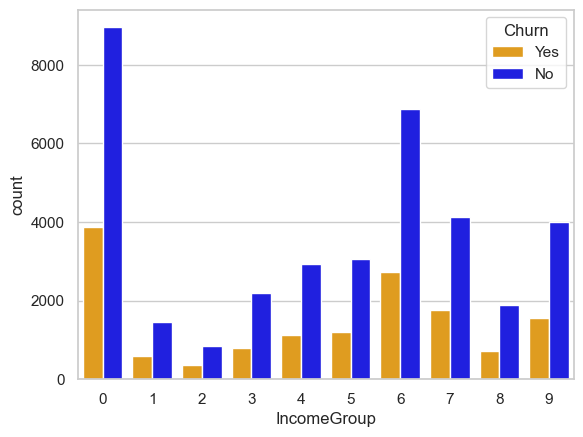

In [15]:
sns.countplot(data = train, x="IncomeGroup", hue="Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each income group: ")
print(train[train['Churn'] == 'Yes']['IncomeGroup'].value_counts()
      / train['IncomeGroup'].value_counts() * 100)

Group zero has both the highest number of subscribers, but also the highest customer churn rate

<Axes: xlabel='Churn', ylabel='MonthlyMinutes'>

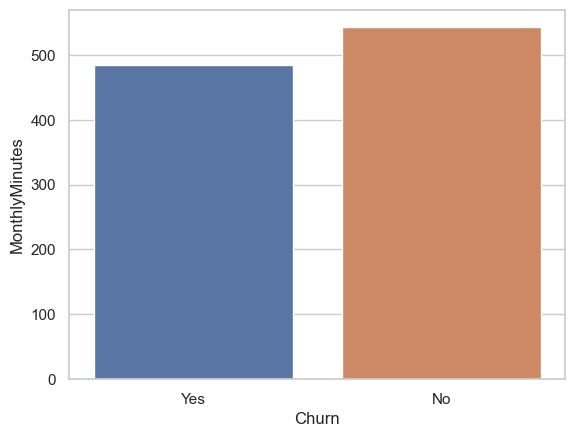

In [16]:
sns.barplot(data = train, x = 'Churn', y = 'MonthlyMinutes', estimator = np.mean)

Percentage of customer churn in each region: 
Other       28.622997
Suburban    28.141409
Town        29.990776
Rural       31.711340
Name: PrizmCode, dtype: float64


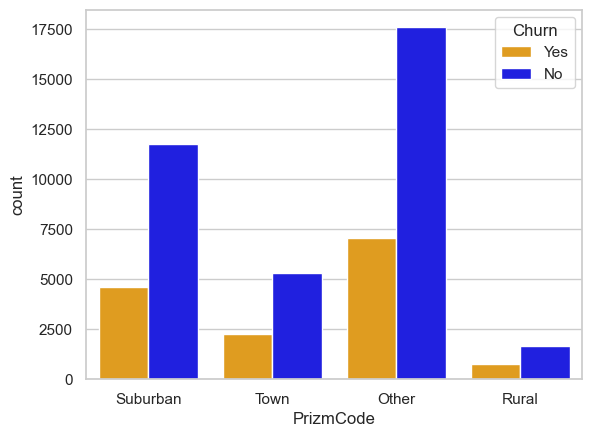

In [17]:
sns.countplot(data = train, x="PrizmCode", hue="Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each region: ")
print(train[train['Churn'] == 'Yes']['PrizmCode'].value_counts()
      / train['PrizmCode'].value_counts() * 100)

We can see from the graph, the number of people using the service in rural areas is the least, and according to calculations that is also where the customer churn rate is highest.

### Categories of dataset

In [18]:
pd.DataFrame(train.value_counts())

0
Churn MonthlyRevenue MonthlyMinutes TotalRecurringCharge DirectorAssistedCalls OverageMinutes RoamingCalls PercChangeMinutes PercChangeRevenues DroppedCalls BlockedCalls UnansweredCalls CustomerCareCalls ThreewayCalls ReceivedCalls OutboundCalls InboundCalls PeakCallsInOut OffPeakCallsInOut DroppedBlockedCalls CallForwardingCalls CallWaitingCalls MonthsInService UniqueSubs ActiveSubs ServiceArea Handsets HandsetModels CurrentEquipmentDays AgeHH1 AgeHH2 ChildrenInHH HandsetRefurbished HandsetWebCapable TruckOwner RVOwner Homeownership BuysViaMailOrder RespondsToMailOffers OptOutMailings NonUSTravel OwnsComputer HasCreditCard RetentionCalls RetentionOffersAccepted NewCellphoneUser NotNewCellphoneUser ReferralsMadeBySubscriber IncomeGroup OwnsMotorcycle AdjustmentsToCreditRating HandsetPrice MadeCallToRetentionTeam CreditRating PrizmCode Occupation   MaritalStatus   
No    1.05           3.0            0.0                  0.00                  3.0            0.0           0.0               0.0               0.0          0.0          1.0             0.0               0.0           0.0           0.0           0.0          0.3            0.0               0.0                 0.0                 0.0              53              1          1          NEVENC760   2.0      1.0           1579.0               70.0   68.0   No           No                 No                No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         8           No             1                         30           No                      1-Highest    Suburban  Professional Yes            1
      119.39         801.0          34.0                 1.24                  219.0          0.0          -175.0            -22.8              9.3          0.3          99.3            3.3               0.0           233.1         1.3           1.3          226.3          82.0              9.7                 0.0                 1.7              27              1          1          BOSBOS617   2.0      2.0           470.0                50.0   38.0   No           Yes                Yes               No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         3           No             0                         30           No                      2-High       Other     Other        No             1
      119.25         1737.0         55.0                 7.42                  184.0          1.1           790.0             94.6              10.0         32.3         204.0           0.7               2.0           335.6         136.0         71.7         582.3          460.0             42.3                0.0                 6.3              22              2          1          MINMIN612   2.0      2.0           375.0                30.0   32.0   Yes          No                 Yes               No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         2           No             0                         80           No                      4-Medium     Other     Retired      No             1
      119.12         861.0          30.0                 10.39                 253.0          1.3          -80.0              0.7               15.7         8.7          28.7            3.7               0.0           277.7         41.0          1.0          305.7          16.7              24.3                0.0                 1.7              17              2          1          DALDAL214   2.0      2.0           488.0                46.0   44.0   No           No                 Y

In [19]:
for i in train.columns:
      if train[i].dtype=='int64':
            print(pd.DataFrame(train[i].value_counts()))

    MonthsInService
11             3599
7              2821
12             2737
13             2719
9              2477
10             2381
14             2291
8              2214
19             2004
15             1871
23             1836
21             1809
16             1778
17             1749
25             1611
18             1509
20             1413
22             1269
24             1174
26             1022
27              935
29              899
31              863
6               746
28              741
33              717
30              700
35              685
32              589
34              543
37              466
36              425
38              286
39              240
41              210
40              175
43              174
42              151
45              144
44              140
47              124
48              117
49              111
46              110
53               90
50               84
51               64
52               57
54               50


### Data splitting
We recognize that some columns have dtype = `object` are categorical data.


In [20]:
train.loc[train['RetentionOffersAccepted'] > 0, 'RetentionOffersAccepted'] = 1
train.loc[train['RetentionCalls'] > 0, 'RetentionCalls'] = 1

In [21]:
features = ['IncomeGroup','RetentionOffersAccepted', 'RetentionCalls']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

    for i in df.columns:
        if df[i].dtype=='object':
            df[i] = df[i].astype('category')
    
convert_cat(train, features)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      51047 non-null  category
 1   MonthlyRevenue             50891 non-null  float64 
 2   MonthlyMinutes             50891 non-null  float64 
 3   TotalRecurringCharge       50891 non-null  float64 
 4   DirectorAssistedCalls      50891 non-null  float64 
 5   OverageMinutes             50891 non-null  float64 
 6   RoamingCalls               50891 non-null  float64 
 7   PercChangeMinutes          50680 non-null  float64 
 8   PercChangeRevenues         50680 non-null  float64 
 9   DroppedCalls               51047 non-null  float64 
 10  BlockedCalls               51047 non-null  float64 
 11  UnansweredCalls            51047 non-null  float64 
 12  CustomerCareCalls          51047 non-null  float64 
 13  ThreewayCalls              5104

In [23]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'IncomeGroup', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',


### Missing Values


In [24]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice', 'MaritalStatus'],
      dtype='object')

In [25]:
def kdeplot(features):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, feature in enumerate(features):
        sns.kdeplot(ax=axes[i], data=train[train['Churn'] == 'No'][feature].dropna(), color='red', label='Churn: No')
        sns.kdeplot(ax=axes[i], data=train[train['Churn'] == 'Yes'][feature].dropna(), color='black', label='Churn: Yes')
        axes[i].set_title("KDE for {}".format(feature))
        axes[i].set_xlabel(feature)
    
    plt.tight_layout()

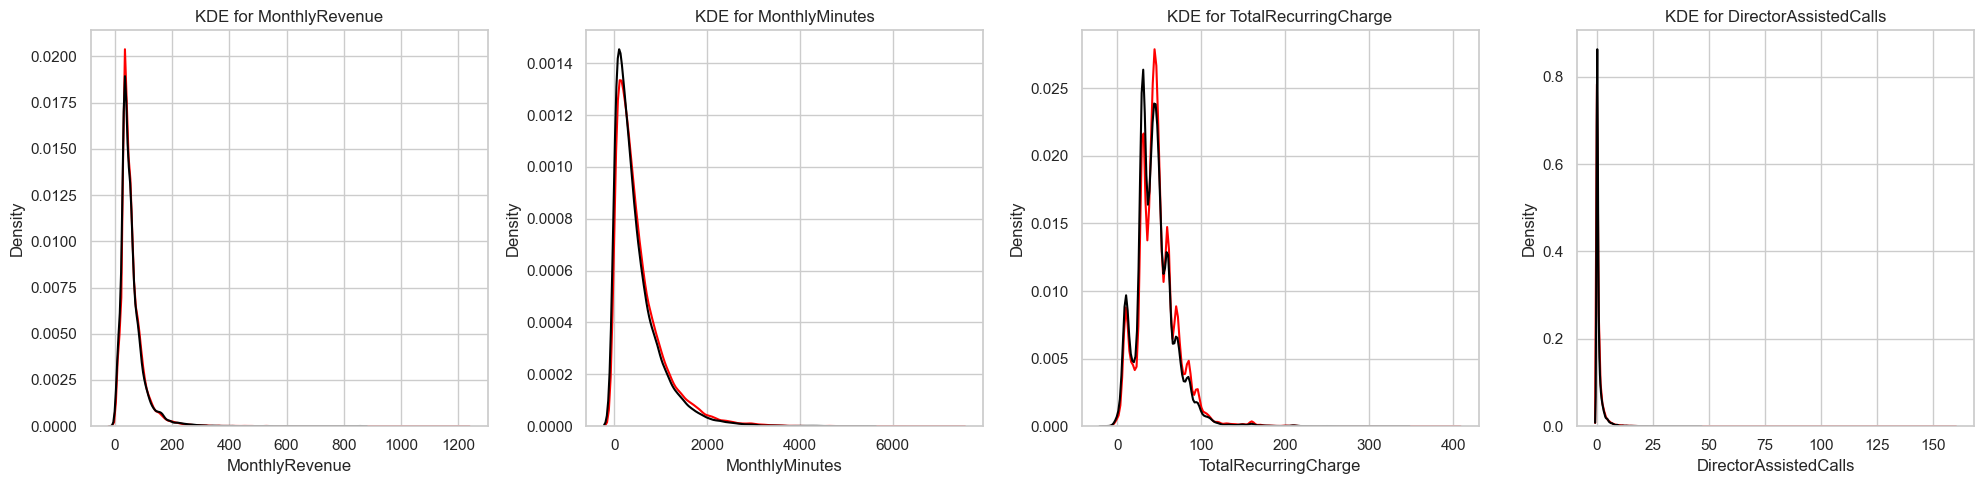

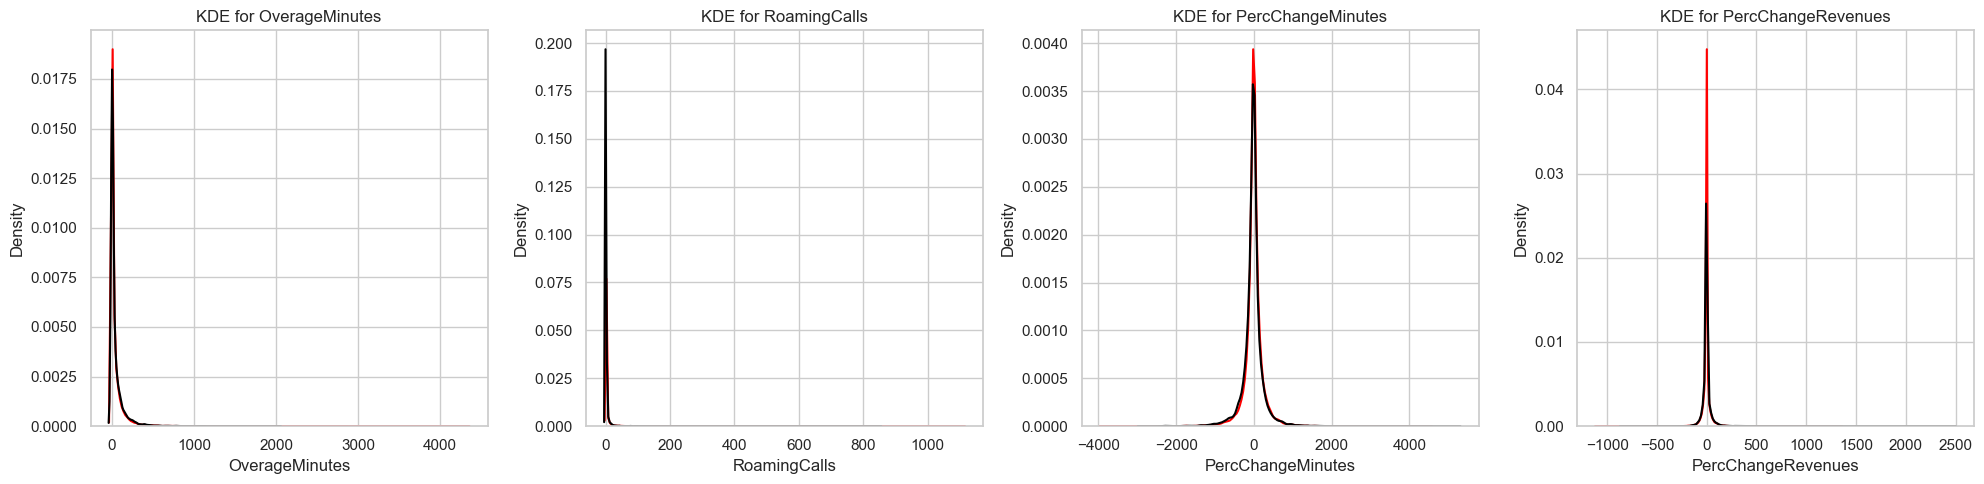

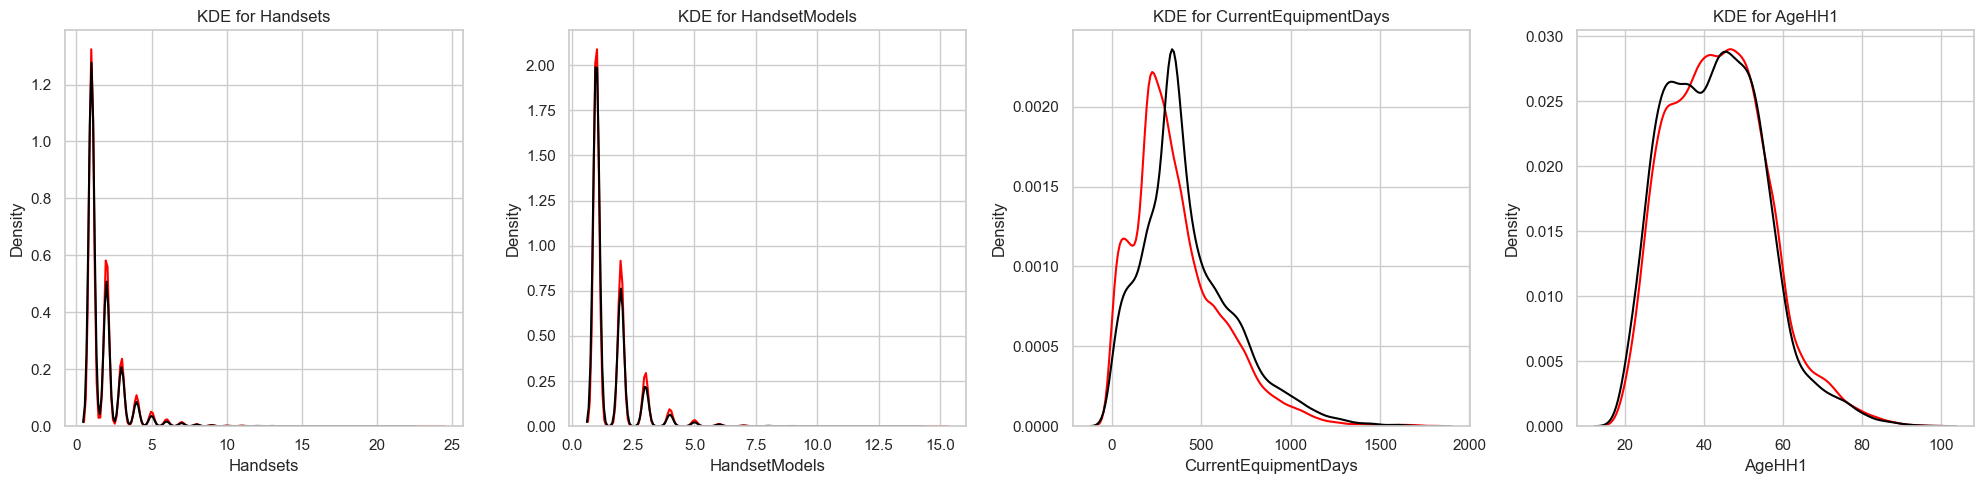

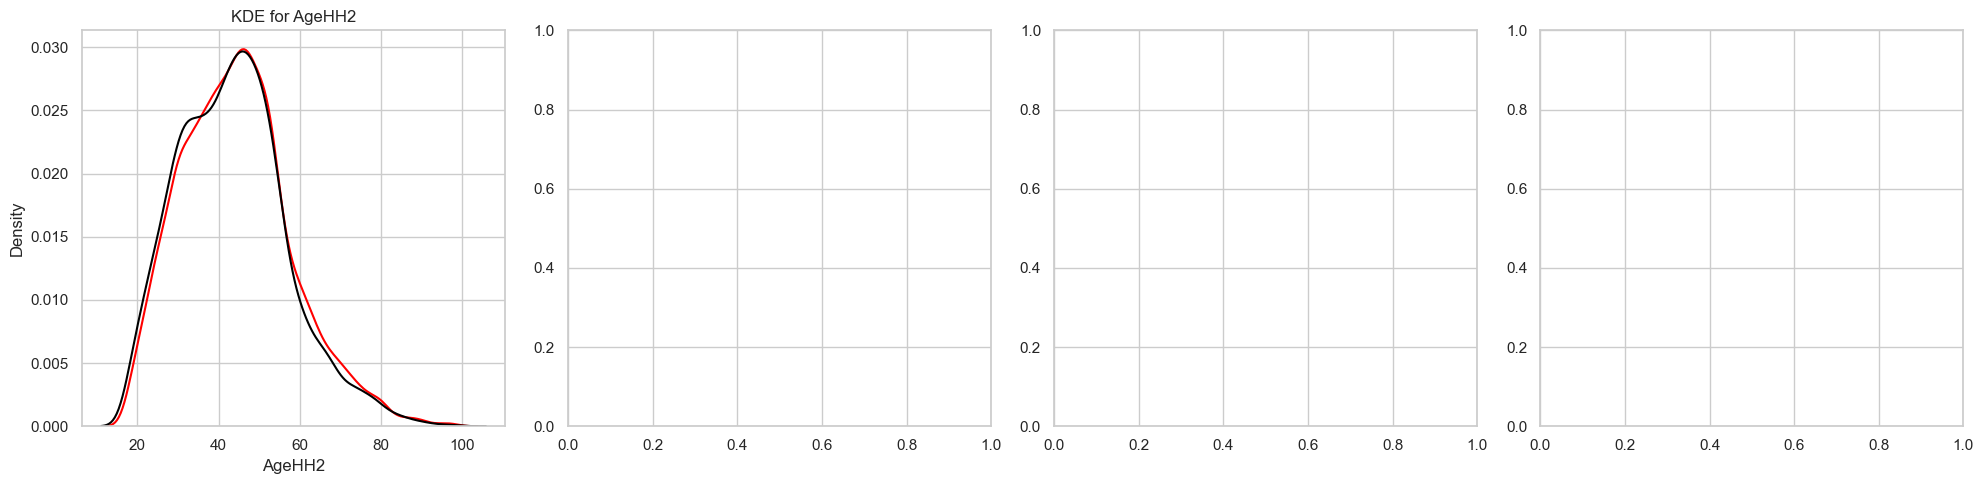

In [26]:
ls = ['MonthlyRevenue', 
      'MonthlyMinutes', 
      'TotalRecurringCharge',
      'DirectorAssistedCalls', 
      'OverageMinutes', 
      'RoamingCalls',
      'PercChangeMinutes', 
      'PercChangeRevenues', 
      'Handsets',
      'HandsetModels', 
      'CurrentEquipmentDays', 
      'AgeHH1',
      'AgeHH2']

for i in range(0, len(ls), 4):
    kdeplot(ls[i:i+4])

In [27]:
train_missings=train.filter(['MonthlyRevenue', 
                             'MonthlyMinutes', 
                             'TotalRecurringCharge',
                             'DirectorAssistedCalls', 
                             'OverageMinutes', 
                             'RoamingCalls',
                             'PercChangeMinutes', 
                             'PercChangeRevenues', 
                             'Handsets',
                             'HandsetModels', 
                             'CurrentEquipmentDays', 
                             'AgeHH1', 
                             'AgeHH2',  
                             'HandsetPrice', 
                             'MaritalStatus'], axis=1)

<Axes: >

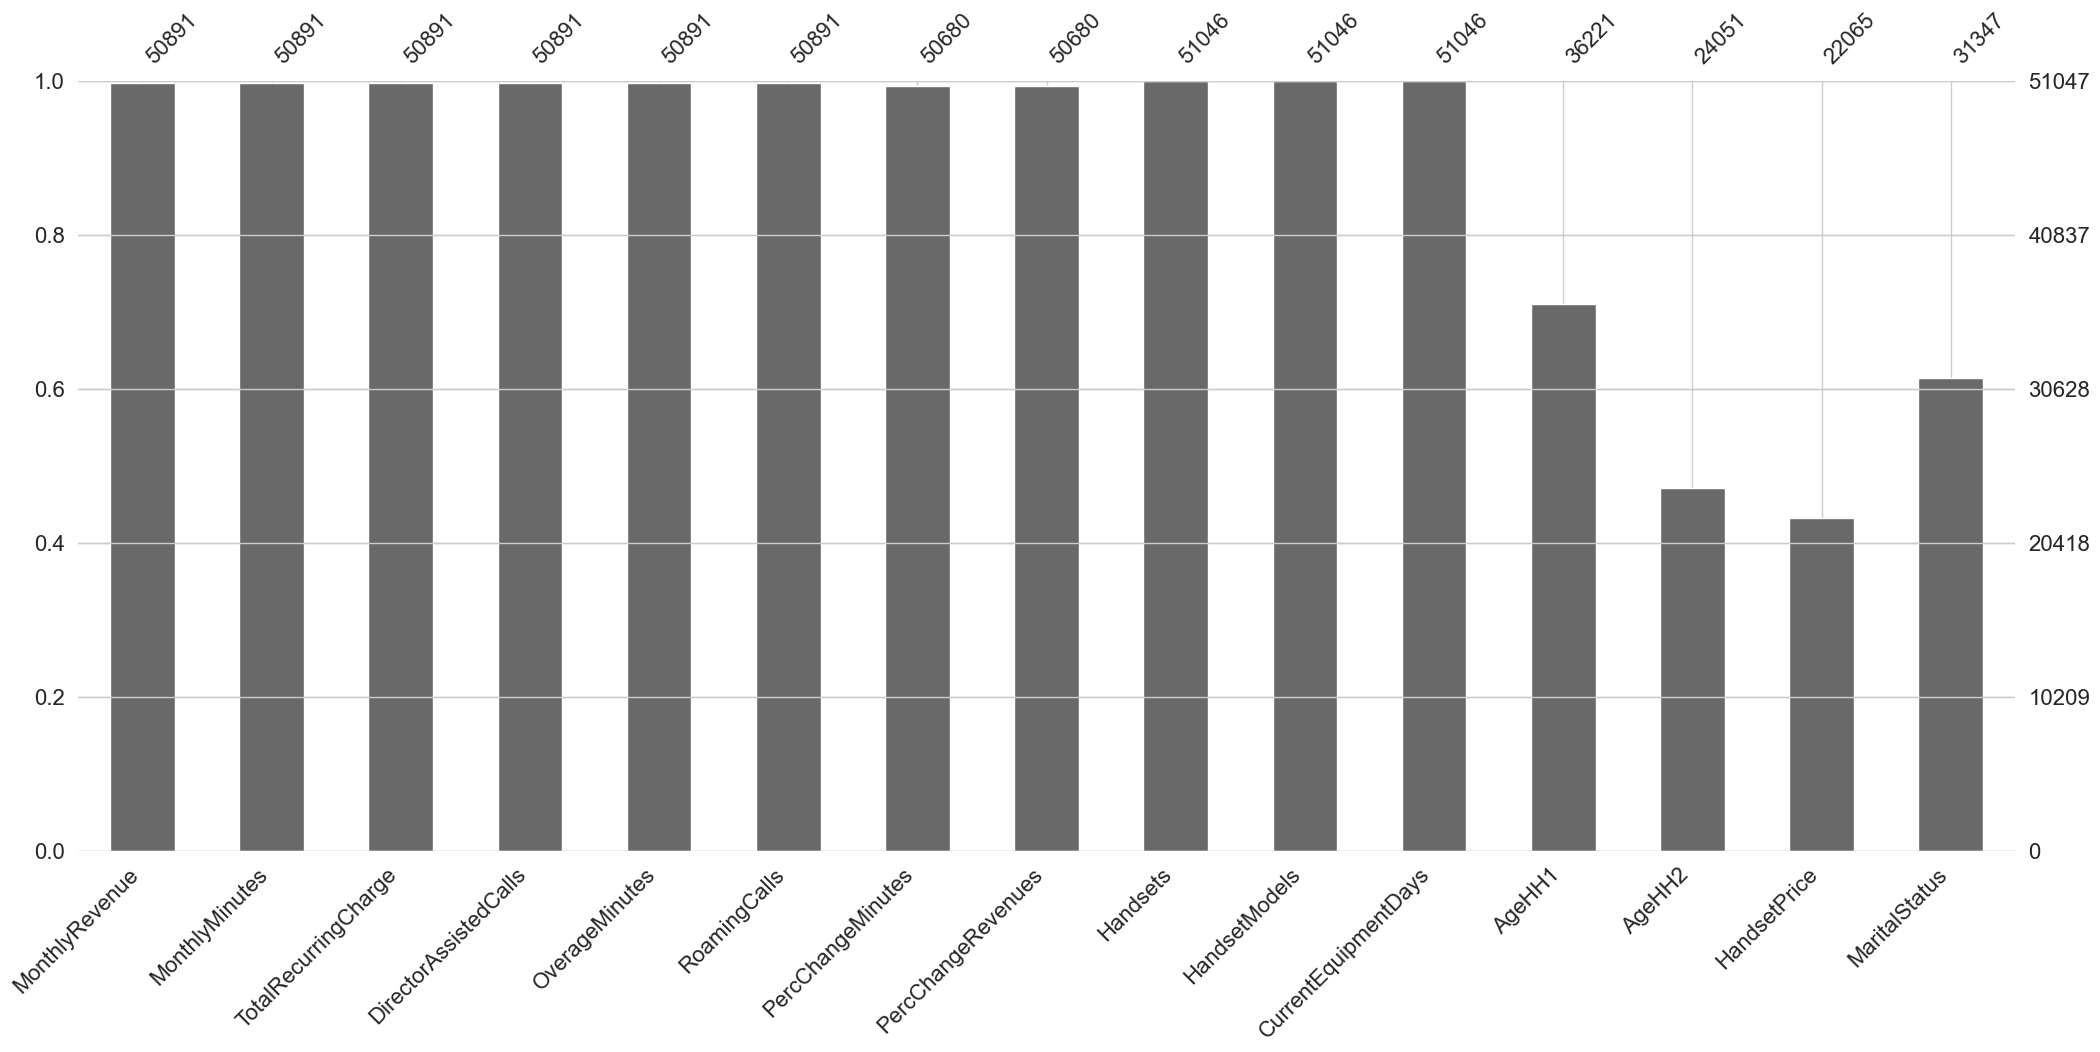

In [28]:
msno.bar(train_missings)

In [29]:
mis_val_train = train_missings.isnull().sum()/len(train_missings) *100

print("Missing-value rate of train data:")
print(mis_val_train)

Missing-value rate of train data:
MonthlyRevenue            0.305601
MonthlyMinutes            0.305601
TotalRecurringCharge      0.305601
DirectorAssistedCalls     0.305601
OverageMinutes            0.305601
RoamingCalls              0.305601
PercChangeMinutes         0.718945
PercChangeRevenues        0.718945
Handsets                  0.001959
HandsetModels             0.001959
CurrentEquipmentDays      0.001959
AgeHH1                   29.043822
AgeHH2                   52.884597
HandsetPrice             56.775129
MaritalStatus            38.591886
dtype: float64


* <i>`"HandsetPrice", "MaritalStatus", "AgeHH2"` have high rate of missing value</i>

In [30]:
train.drop(["HandsetPrice", "MaritalStatus", "AgeHH2"], axis=1, inplace=True)

* Some attributes that are not strongly related to the topic
`TruckOwner,RVOwner, OwnsMotorcycle, HandsetRefurbished, NonUSTravel, BuysViaMailOrder, OptOutMailings, MadeCallToRetentionTeam`

In [31]:
train.drop(["TruckOwner", "RVOwner", "OwnsMotorcycle", "HandsetRefurbished", "NonUSTravel",
            "BuysViaMailOrder", "OptOutMailings", "MadeCallToRetentionTeam"], axis=1, inplace=True)

In [32]:
churn = train[train["Churn"] == "Yes"]
non_churn = train[train["Churn"] == "No"]

In [33]:
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,...,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,10256.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,...,1.615335,19.044321,1.598532,1.370811,1.736932,1.501733,421.903881,42.734594,0.046904,0.043641
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,...,4.774239,9.336919,1.852533,0.761329,1.262219,0.863085,259.940076,12.334385,0.240896,0.297278
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,...,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,18.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,...,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,249.000000,32.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,...,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,366.000000,42.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,...,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,564.000000,52.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,...,135.700000,61.000000,196.000000,53.000000,22.000000,14.000000,1779.000000,98.000000,9.000000,9.000000


In [34]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,...,36336.000000,36336.000000,36336.000000,36336.000000,36335.000000,36335.000000,36335.000000,25965.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,...,1.931666,18.639641,1.505284,1.347672,1.833466,1.581836,363.801156,43.633545,0.054161,0.058069
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,...,5.879328,9.979326,0.843058,0.637329,1.357123,0.921723,249.334338,12.397188,0.330772,0.412795
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,18.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,...,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,197.000000,34.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,...,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,310.000000,44.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,...,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,493.000000,52.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,...,212.700000,60.000000,12.000000,11.000000,24.000000,15.000000,1812.000000,99.000000,35.000000,25.000000


In [35]:
# nhóm "Churn" là "Yes" và "No", hàm này sẽ tính median của riêng từng nhóm và thay vào những ô null
train["MonthlyRevenue"].fillna(train.groupby("Churn")["MonthlyRevenue"].transform("median"), inplace = True)

In [36]:
train["MonthlyMinutes"].fillna(train.groupby("Churn")["MonthlyMinutes"].transform("median"), inplace = True)

In [37]:
train['TotalRecurringCharge'].fillna(train.groupby("Churn")["TotalRecurringCharge"].transform("median"),inplace=True)

In [38]:
train['PercChangeRevenues'].fillna(train["PercChangeRevenues"].median(),inplace=True)

In [39]:
train['PercChangeMinutes'].fillna(train['PercChangeMinutes'].median(),inplace=True)

In [40]:
train['RoamingCalls'].fillna(value=0,inplace=True)

In [41]:
train['OverageMinutes'].fillna(value=0,inplace=True)

In [42]:
train['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [43]:
train['Handsets'].fillna(train['Handsets'].median(),inplace=True)

In [44]:
train['HandsetModels'].fillna(train['HandsetModels'].median(),inplace=True)

In [45]:
train['CurrentEquipmentDays'].fillna(train['CurrentEquipmentDays'].median(),inplace=True)

In [46]:
train["AgeHH1"].fillna(train.groupby("Churn")["AgeHH1"].transform("median"), inplace = True)

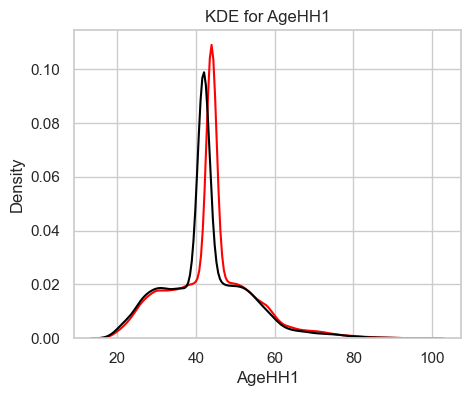

In [47]:
plt.figure(figsize=(5, 4))
plt.title("KDE for {}".format('AgeHH1'))
ax0 = sns.kdeplot(train[train['Churn'] == 'No']['AgeHH1'].dropna(), color= 'red', label= 'Churn: No')
ax1 = sns.kdeplot(train[train['Churn'] == 'Yes']['AgeHH1'].dropna(), color= 'black', label= 'Churn: Yes')

In [48]:
train.isnull().sum()

Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
ChildrenInHH                  0
HandsetW

In [49]:
train['Handsets'] = train['Handsets'].astype('int64')
train['HandsetModels'] = train['HandsetModels'].astype('int64')

* <b>Correlation between features</b>

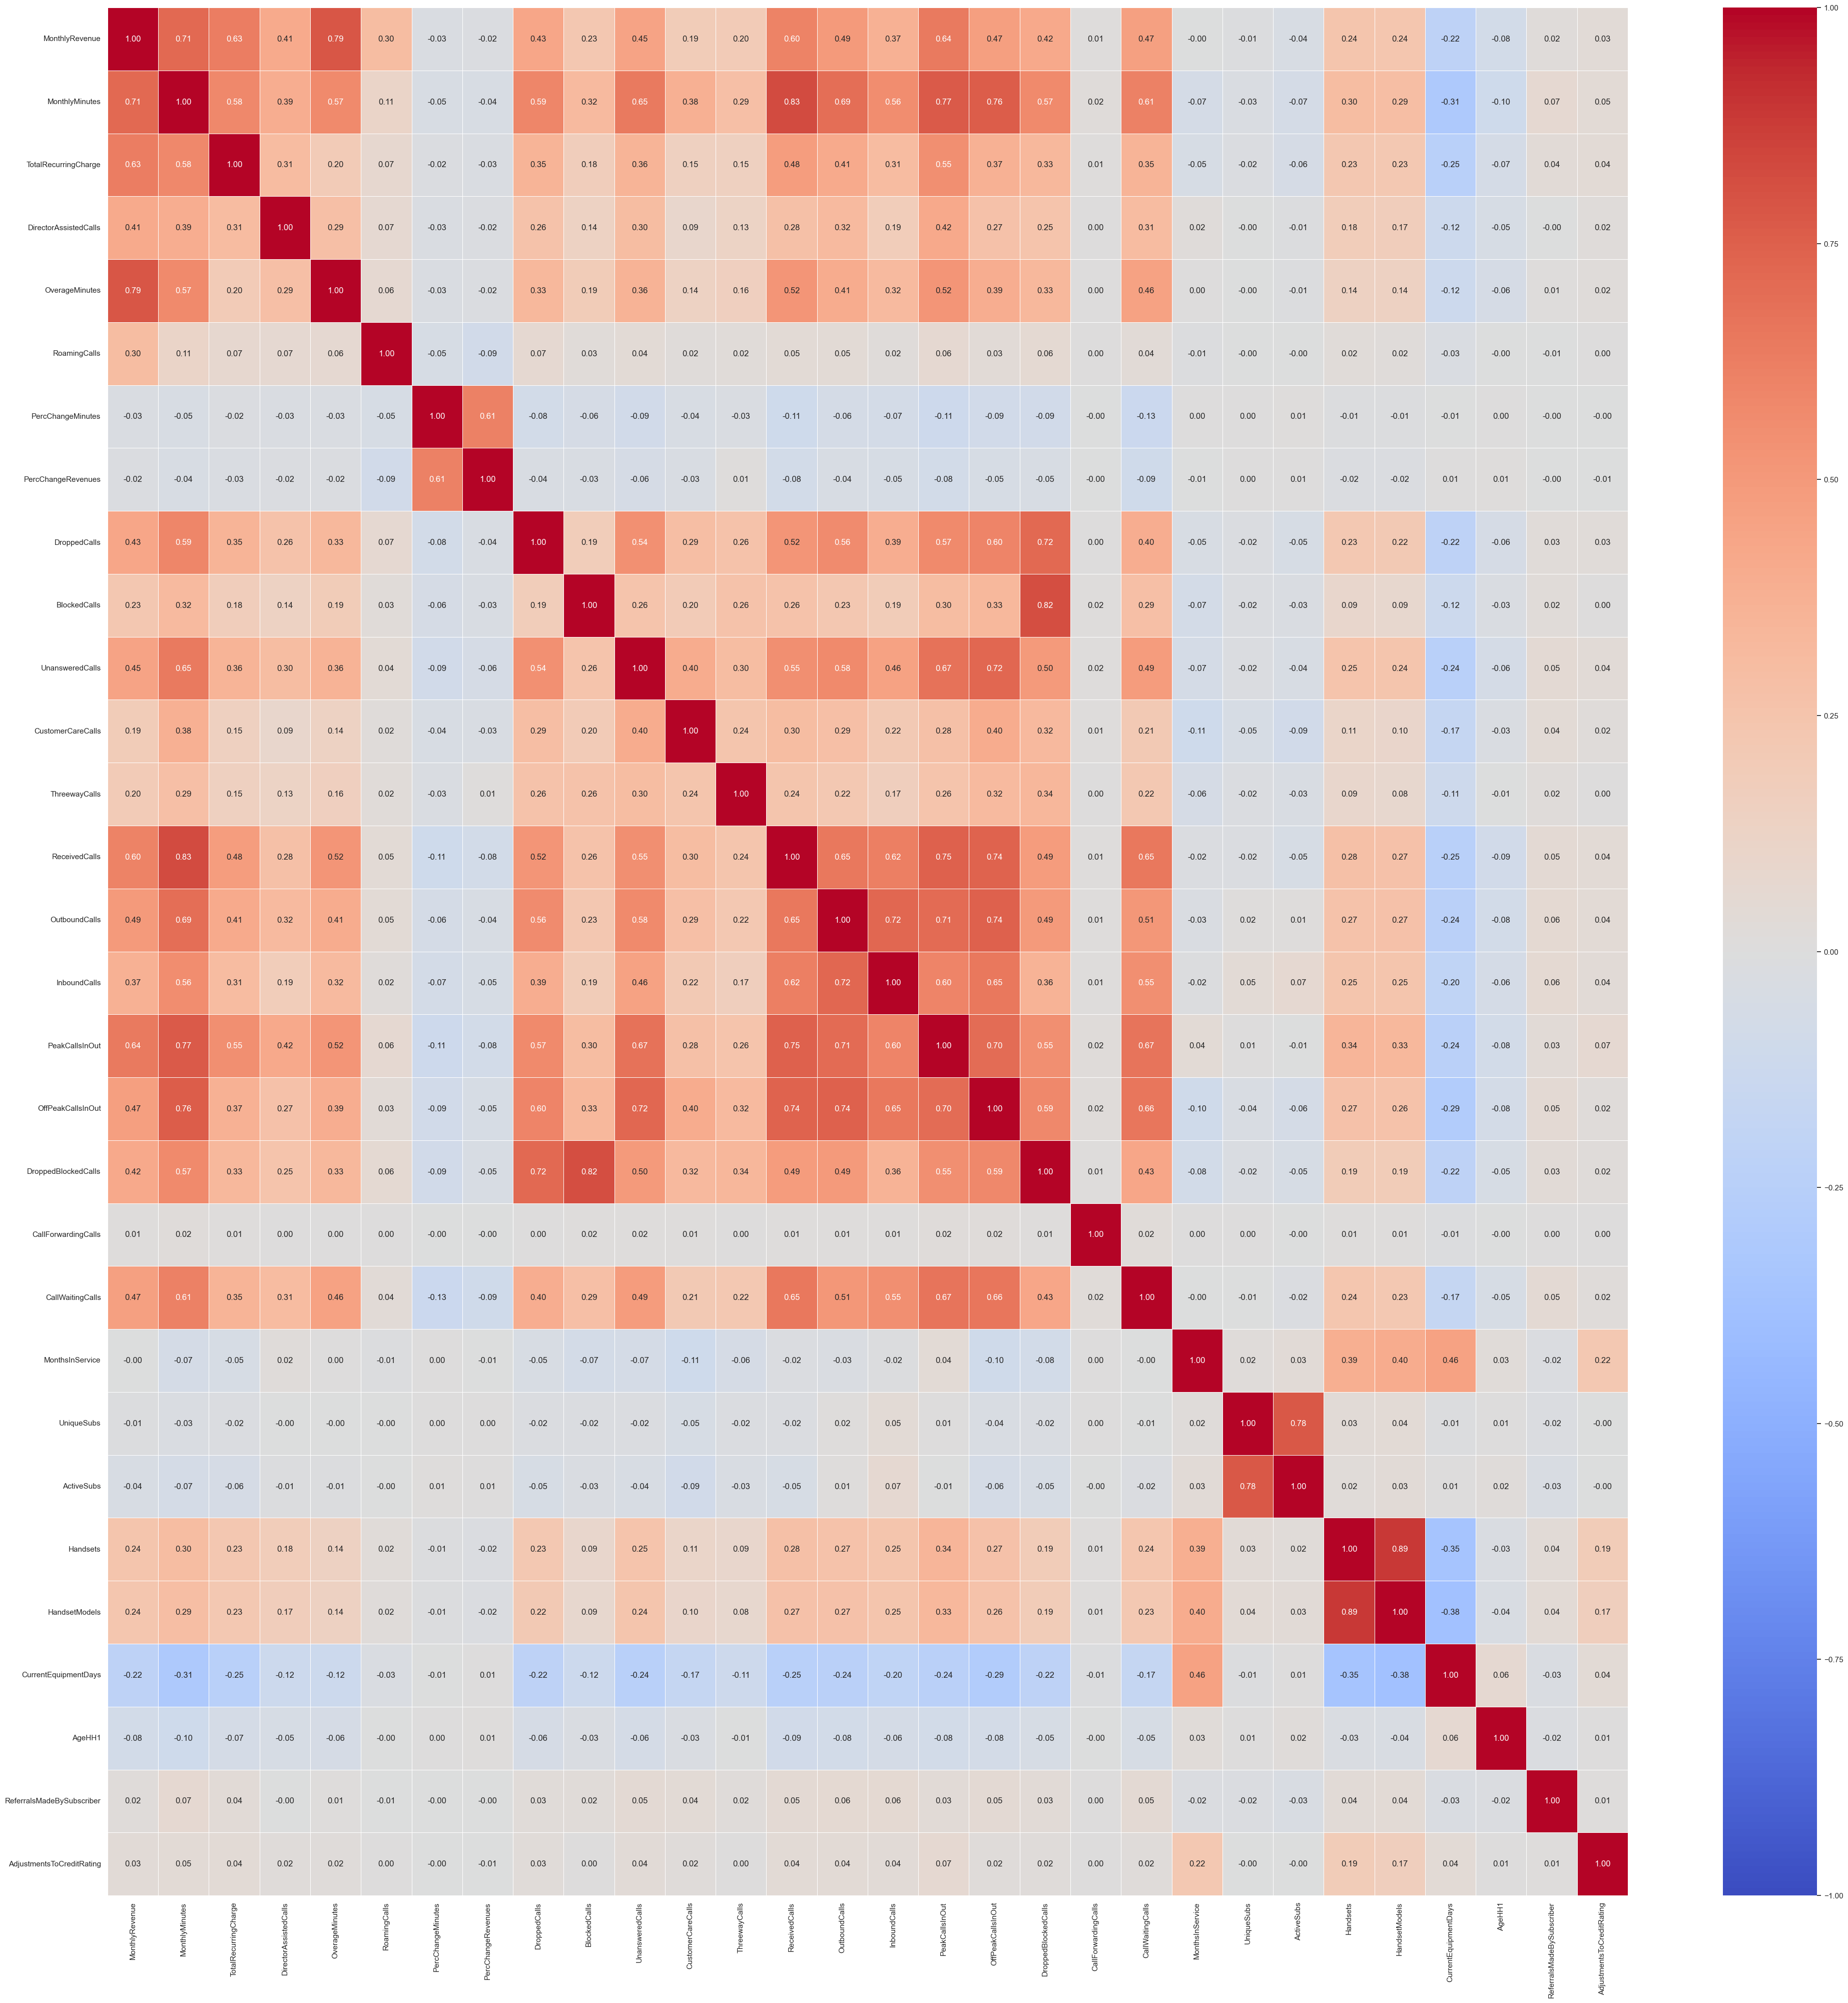

In [50]:
# sns.reset_defaults() 
cor = train.corr()
ones_corr = np.ones_like(cor, dtype = bool)
mask = np.triu(ones_corr)
f, ax = plt.subplots(figsize = (49,49))
sns.heatmap(cor, fmt=".2f", linewidths=0.5, ax=ax, annot = True,
            cmap='coolwarm',
            vmin = -1, vmax = 1)
# plt.clf()
plt.show()

Pairs of variables with strong positive correlation will be colored in red and have a value close to 1, while pairs of variables with strong negative correlation will be colored in blue and have a value close to -1. If there is no correlation between the variables, the color will be white and the value will be 0.

### Outlier Detection

In [51]:
print ("There are " + str(train.shape[1]) + " columns and  " + str(train.shape[0]) + " rows in the train data.\n")

There are 46 columns and  51047 rows in the train data.



In [52]:
from scipy.stats import zscore
from scipy import stats 

train_outliers=train.select_dtypes(include=['int', 'float'])
train_outliers.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0.3,61,2,1,2,2,361.0,62.0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0.0,58,1,1,2,1,1504.0,40.0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0.0,60,1,1,1,1,1812.0,26.0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,22.7,59,2,2,9,4,458.0,30.0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0.0,53,2,2,4,3,852.0,46.0,0,1


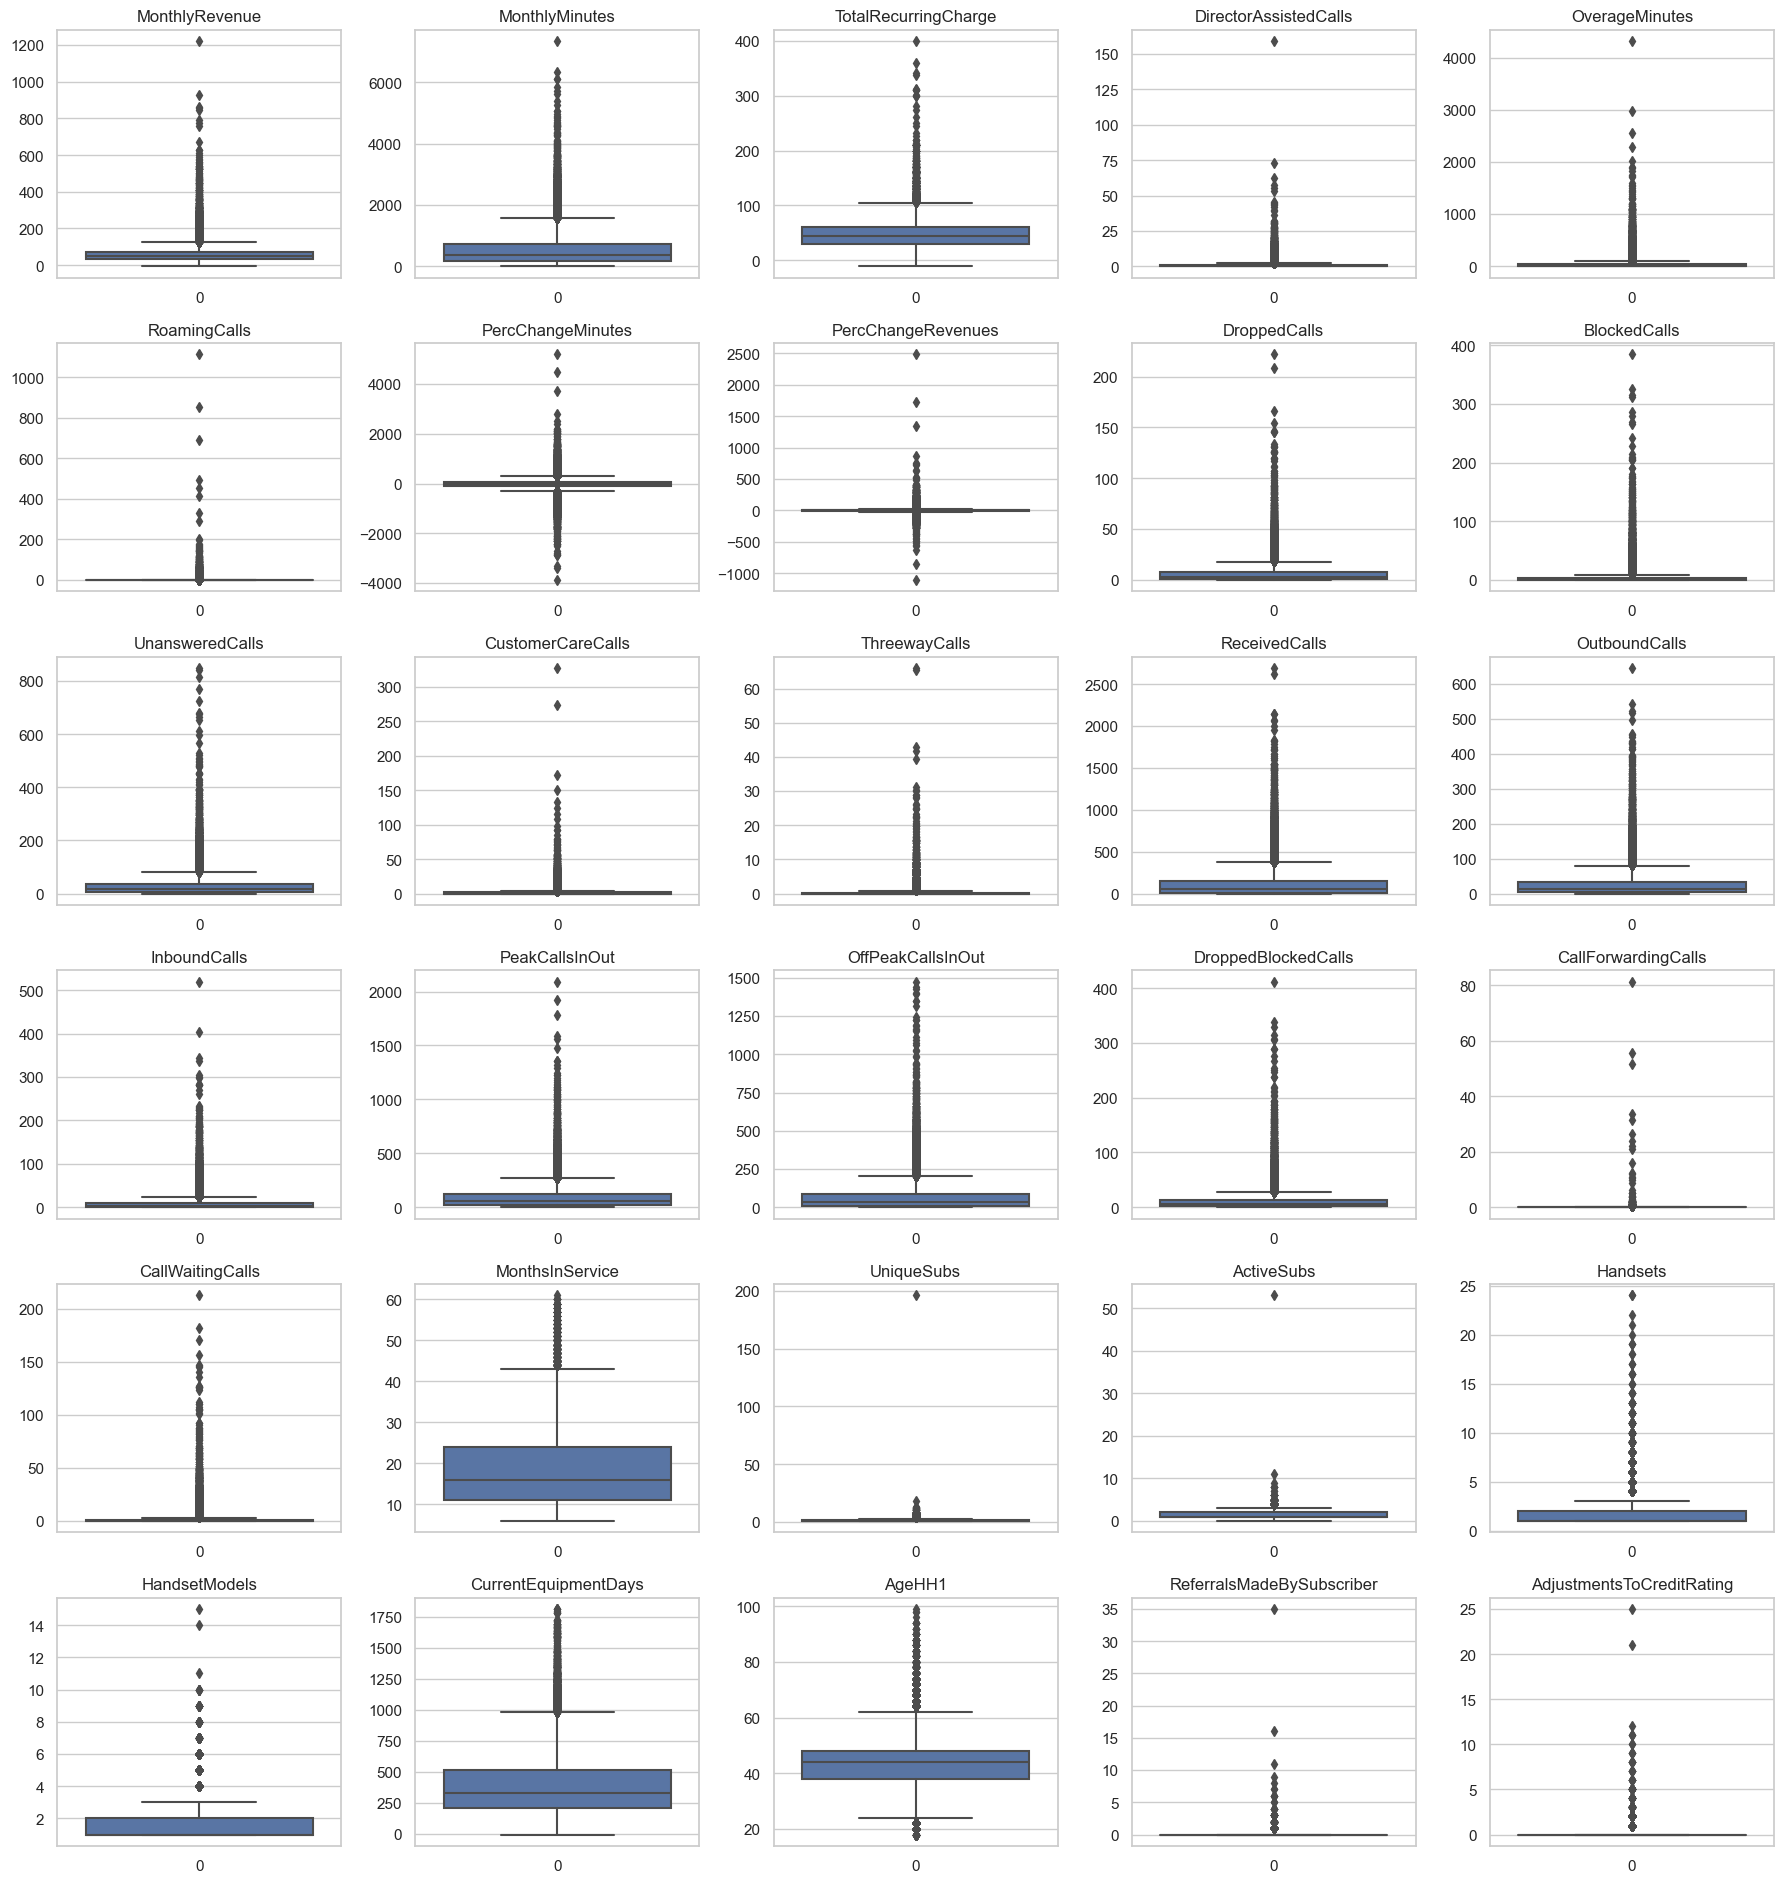

In [53]:
plt.figure(figsize=(18,25))
for num,col in enumerate(train_outliers.columns,1):
    ax = plt.subplot(8, 5, num)
    sns.boxplot(train_outliers[col], ax = ax)
    ax.set_title(col)
    plt.tight_layout()

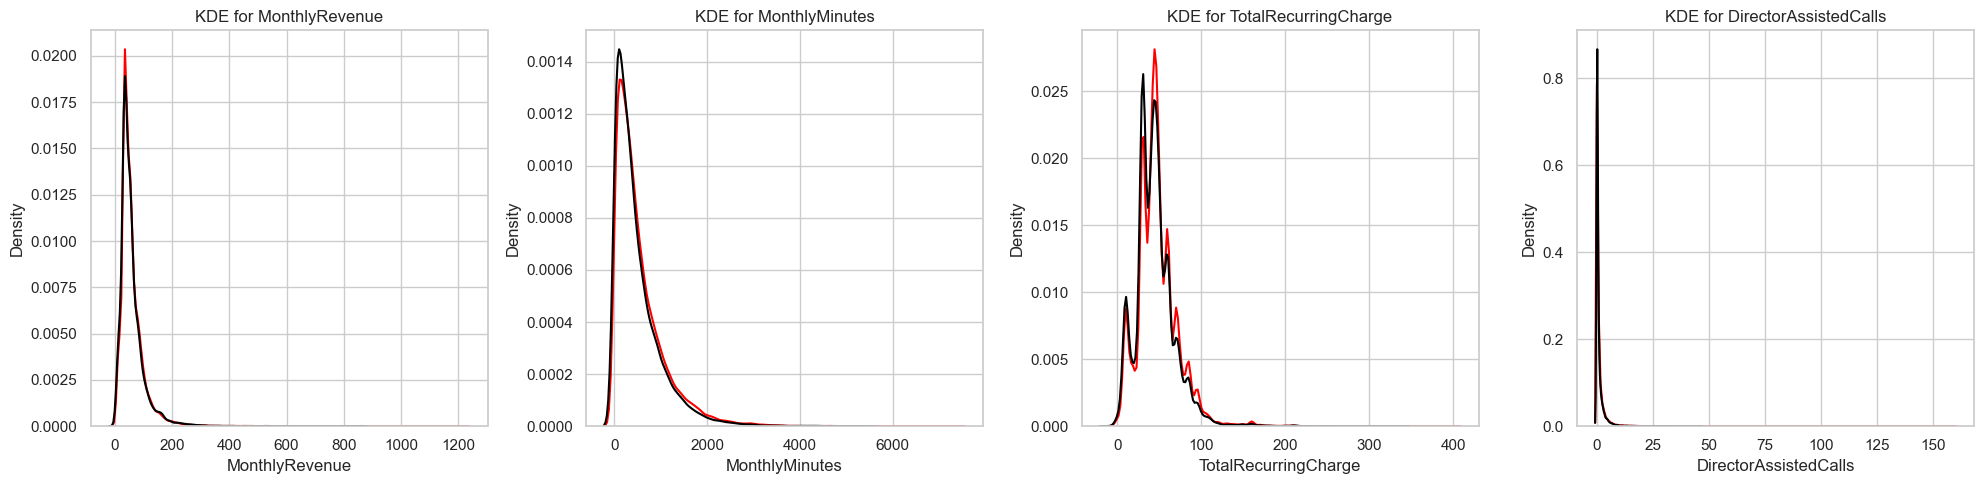

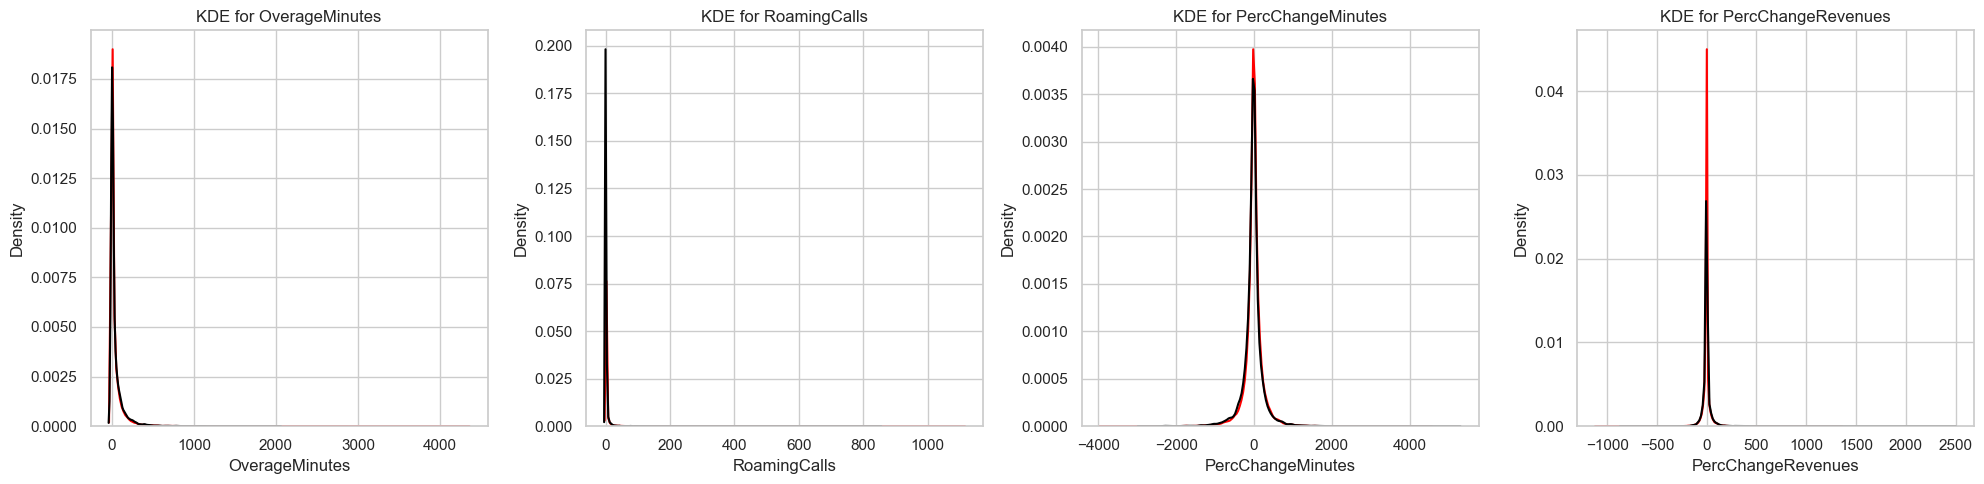

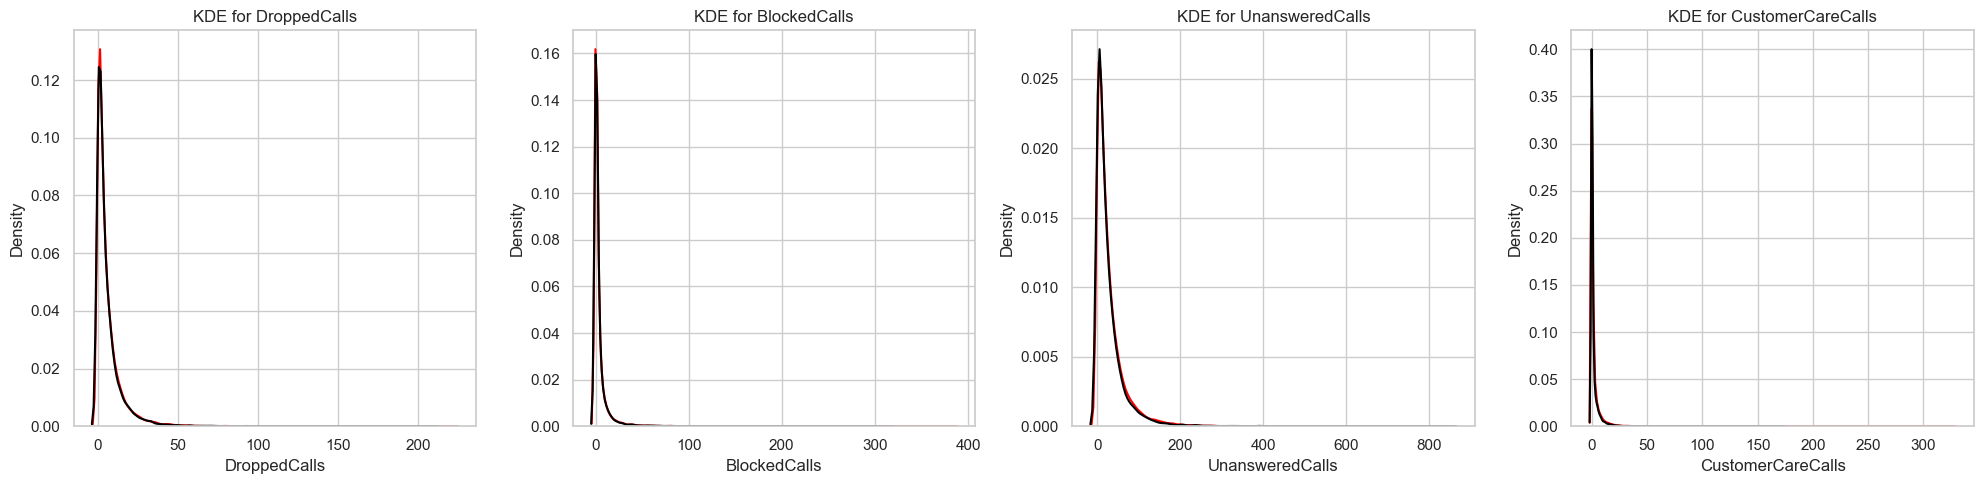

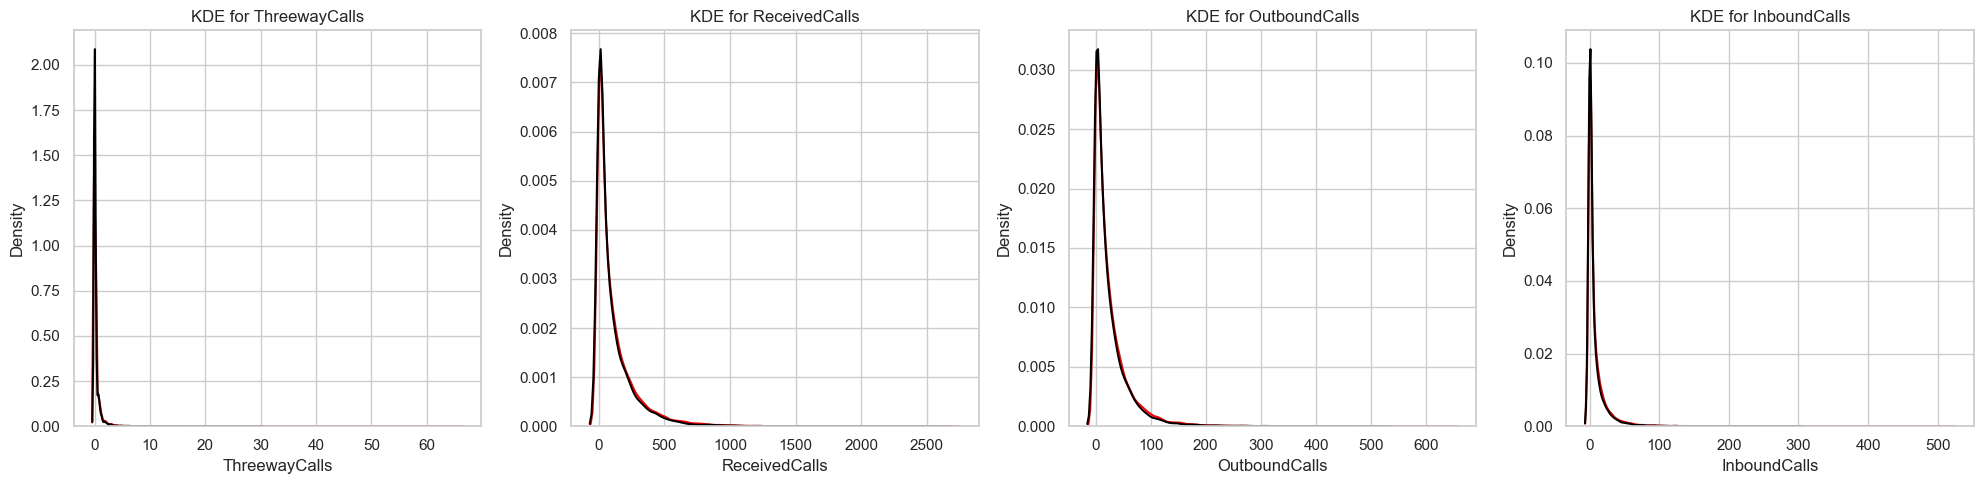

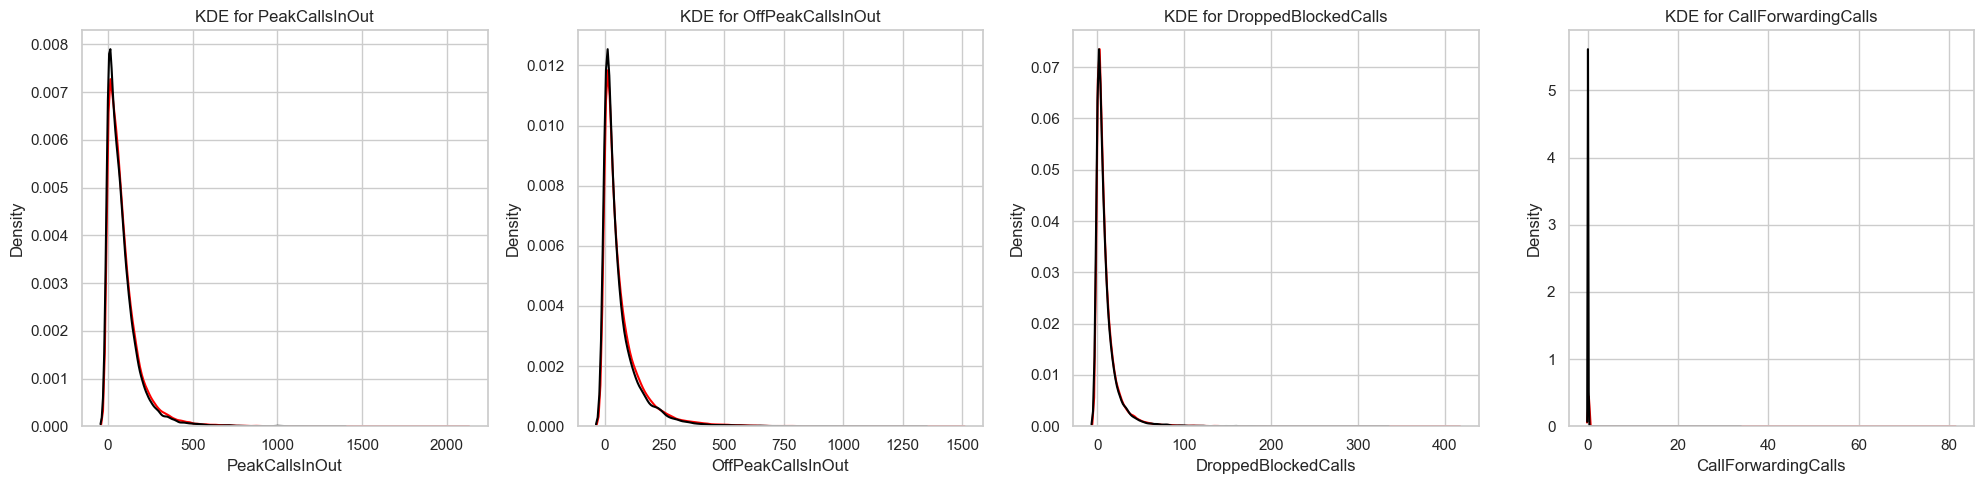

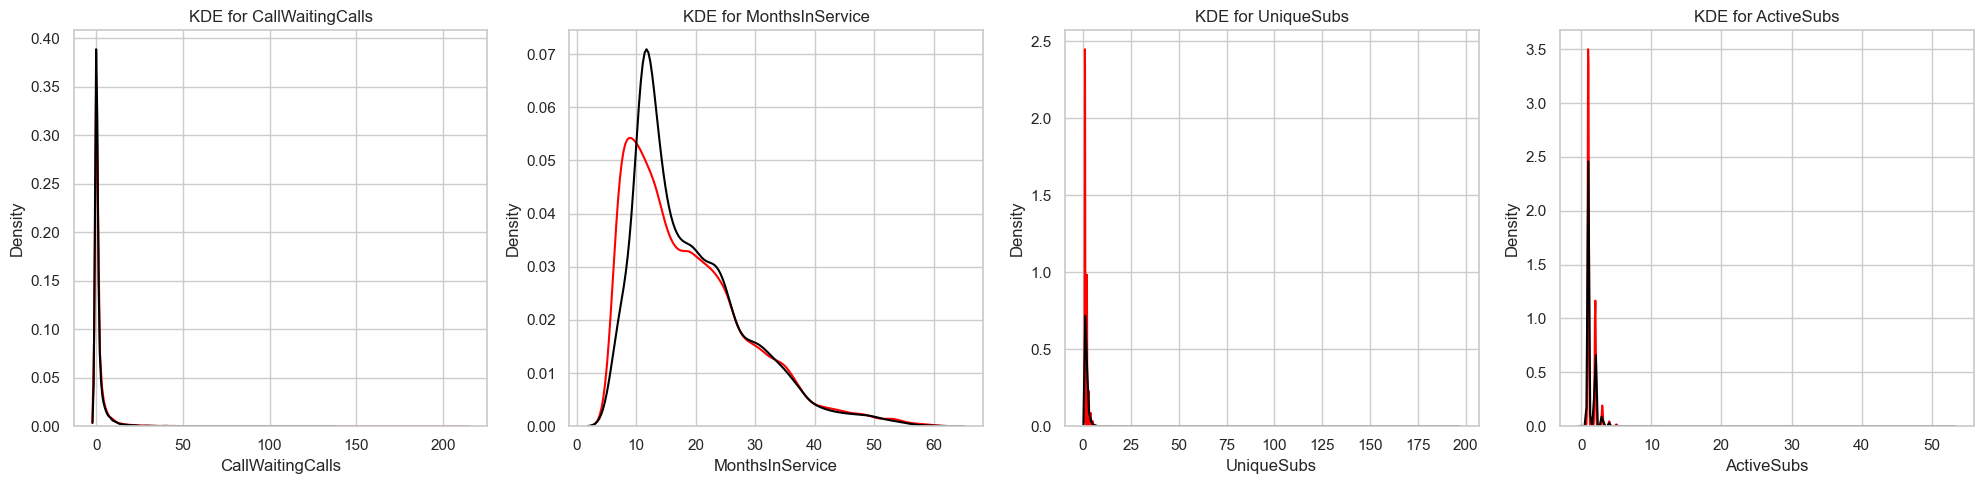

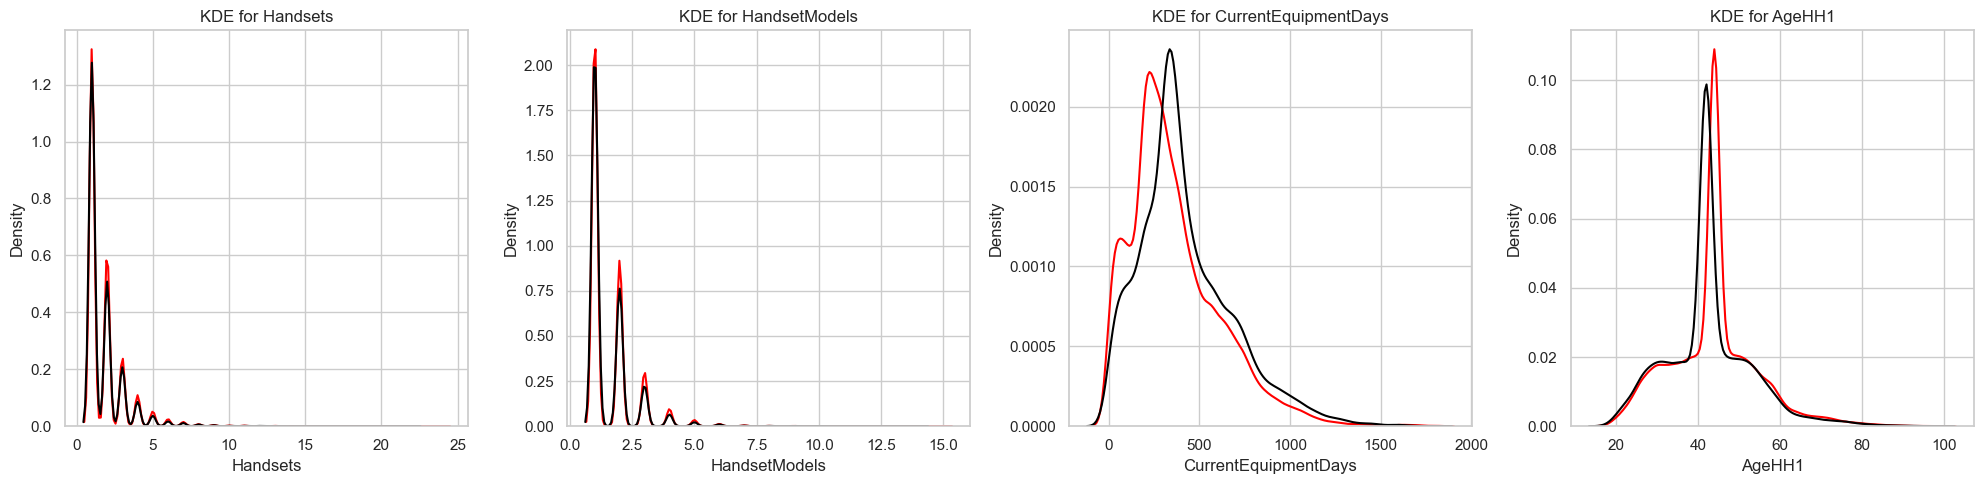

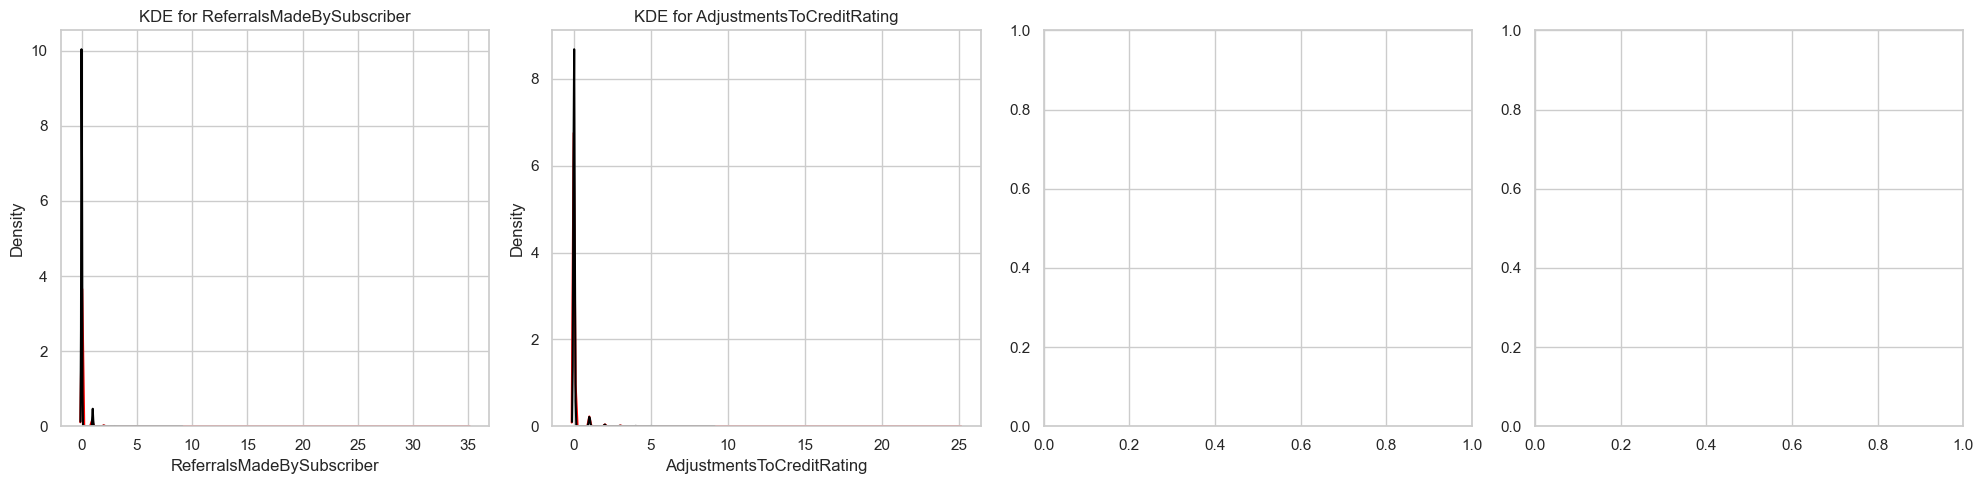

In [54]:
for i in range(0, len(train_outliers.columns), 4):
    kdeplot(train_outliers.columns[i:i+4])

In [55]:
outliers1={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    # z = (x-mean)/std
    
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    outliers1[col] = len(train_outliers[col][(train_outliers[col] > upper_replace_value)| (train_outliers[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers1.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue       880
1              MonthlyMinutes       914
2        TotalRecurringCharge       541
3       DirectorAssistedCalls       837
4              OverageMinutes       901
5                RoamingCalls       315
6           PercChangeMinutes      1102
7          PercChangeRevenues       841
8                DroppedCalls       987
9                BlockedCalls       819
10            UnansweredCalls       975
11          CustomerCareCalls       853
12              ThreewayCalls       567
13              ReceivedCalls      1067
14              OutboundCalls       966
15               InboundCalls       976
16             PeakCallsInOut       939
17          OffPeakCallsInOut      1034
18        DroppedBlockedCalls       883
19        CallForwardingCalls        49
20           CallWaitingCalls       765
21            MonthsInService       583
22                 UniqueSubs       234
23                 ActiveSubs       611


In [56]:
train_new1 = train_outliers.copy()
outliers_3={}
for col in train_outliers:
    q1 = train_outliers[col].quantile(q=0.25)
    q3 = train_outliers[col].quantile(q=0.75)
    iqr = stats.iqr(train_outliers[col]) 
    train_new1 = train_outliers.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_3[col] = len(train_new1[col][(train_new1[col] > upper_limit)| (train_new1[col] < lower_limit)])
outliers_iqr2 = pd.DataFrame(outliers_3.items(),columns=['Feature','Outliers'])
print(outliers_iqr2)

                      Feature  Outliers
0              MonthlyRevenue      3009
1              MonthlyMinutes      2588
2        TotalRecurringCharge       824
3       DirectorAssistedCalls      5530
4              OverageMinutes      5980
5                RoamingCalls     10070
6           PercChangeMinutes      6926
7          PercChangeRevenues     13471
8                DroppedCalls      3712
9                BlockedCalls      5517
10            UnansweredCalls      3630
11          CustomerCareCalls      6721
12              ThreewayCalls      4622
13              ReceivedCalls      3641
14              OutboundCalls      3342
15               InboundCalls      4973
16             PeakCallsInOut      2803
17          OffPeakCallsInOut      3624
18        DroppedBlockedCalls      3936
19        CallForwardingCalls       234
20           CallWaitingCalls      7448
21            MonthsInService      1218
22                 UniqueSubs      1874
23                 ActiveSubs       611


In [57]:
train_new1 = train_outliers.copy()
outliers_2={}
for col in train_outliers:
    q1 = train_outliers[col].quantile(q=0.15)
    q3 = train_outliers[col].quantile(q=0.85)
    iqr = stats.iqr(train_outliers[col]) 
    train_new1 = train_outliers.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_2[col] = len(train_new1[col][(train_new1[col] > upper_limit)| (train_new1[col] < lower_limit)])
outliers_iqr1 = pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
print(outliers_iqr1)

                      Feature  Outliers
0              MonthlyRevenue      2157
1              MonthlyMinutes      1553
2        TotalRecurringCharge       560
3       DirectorAssistedCalls      3920
4              OverageMinutes      4000
5                RoamingCalls      6659
6           PercChangeMinutes      4947
7          PercChangeRevenues      9679
8                DroppedCalls      2524
9                BlockedCalls      3966
10            UnansweredCalls      2436
11          CustomerCareCalls      4521
12              ThreewayCalls      3234
13              ReceivedCalls      2318
14              OutboundCalls      2174
15               InboundCalls      3390
16             PeakCallsInOut      1924
17          OffPeakCallsInOut      2317
18        DroppedBlockedCalls      2684
19        CallForwardingCalls       234
20           CallWaitingCalls      5026
21            MonthsInService       583
22                 UniqueSubs      1874
23                 ActiveSubs       611


In [58]:
outliers2={}
for col in train_outliers:
    q1, q3 = np.percentile(train_outliers[col], [25, 75])
    iqr = q3 - q1
    upper_replace_value = q3 + 1.5 * iqr
    lower_replace_value = q1 - 1.5 * iqr
    
    train.loc[train_outliers[col] > upper_replace_value, col] = upper_replace_value
    train.loc[train_outliers[col] < lower_replace_value, col] = lower_replace_value 
    outliers2[col] = len(train[col][(train[col] > upper_replace_value)| (train[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers2.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue         0
1              MonthlyMinutes         0
2        TotalRecurringCharge         0
3       DirectorAssistedCalls         0
4              OverageMinutes         0
5                RoamingCalls         0
6           PercChangeMinutes         0
7          PercChangeRevenues         0
8                DroppedCalls         0
9                BlockedCalls         0
10            UnansweredCalls         0
11          CustomerCareCalls         0
12              ThreewayCalls         0
13              ReceivedCalls         0
14              OutboundCalls         0
15               InboundCalls         0
16             PeakCallsInOut         0
17          OffPeakCallsInOut         0
18        DroppedBlockedCalls         0
19        CallForwardingCalls         0
20           CallWaitingCalls         0
21            MonthsInService         0
22                 UniqueSubs         0
23                 ActiveSubs         0


Removing sparse feature

In [59]:
for i in train.columns:
    print(train[i].value_counts())

No     36336
Yes    14711
Name: Churn, dtype: int64
126.91    3009
29.99     1069
34.99      806
10.00      469
30.00      404
          ... 
126.83       1
97.72        1
106.78       1
90.05        1
109.96       1
Name: MonthlyRevenue, Length: 10048, dtype: int64
1566.5    2588
0.0        723
2.0        138
330.0      135
8.0        127
          ... 
1564.0       1
1503.0       1
1391.0       1
1325.0       1
1541.0       1
Name: MonthlyMinutes, Length: 1566, dtype: int64
 30.0    7302
 45.0    6716
 60.0    4435
 40.0    4415
 50.0    4143
         ... 
-9.0        1
-5.0        1
-1.0        1
-11.0       1
 1.0        1
Name: TotalRecurringCharge, Length: 112, dtype: int64
0.000    24668
0.250     6757
2.475     5530
0.500     3948
0.740     2748
0.990     1993
1.240     1631
1.490     1212
1.730      955
1.980      823
2.230      667
0.330       50
0.660       29
1.320       17
1.650       14
2.310        5
Name: DirectorAssistedCalls, dtype: int64
0.0      23418
100.0     6065

In [60]:
train.drop(['CallForwardingCalls', 'AdjustmentsToCreditRating', 'ReferralsMadeBySubscriber'], axis=1, inplace=True)

### Label encoding

In [61]:
for i in train.columns:
      if train[i].dtype==object:
            print(pd.DataFrame(train[i].value_counts()))

#### Encode Dependent Variables

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_df=train.copy()
enc = LabelEncoder()
one_enc = OneHotEncoder()

for col in train_df.columns:
    if (col == 'Occupation' or col == 'PrizmCode'):
        one_enc.fit(train_df[col].astype(str).values.reshape(-1,1))  # fit the one-hot encoder
        train_df[col] = one_enc.transform(train_df[col].astype(str).values.reshape(-1,1)).toarray() 
    elif (train_df.dtypes[col] == 'category'):
        enc.fit(train_df[col].astype(str))
        train_df[col] = enc.transform(train_df[col].astype(str))
        
train_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,CreditRating,PrizmCode,Occupation
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,1,1,0,0,0,4,0,0.0,0.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1,1,0,0,1,0,5,3,0.0,0.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,1,0,0,1,0,6,2,0.0,0.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,18.2,...,0,1,0,0,1,0,6,3,1.0,0.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,1,0,0,0,1,9,0,1.0,0.0


In [63]:
train_df.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,CreditRating,PrizmCode,Occupation
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,...,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,0.288185,0.320842,0.148667,0.019316,0.029757,0.003076,0.737301,0.171509,0.014359,0.017219,...,0.185398,0.675907,0.034184,0.017259,0.192450,0.137814,4.324524,1.886967,0.482986,0.047505
std,0.452922,0.466805,0.355763,0.137633,0.169918,0.055373,0.440105,0.376956,0.118968,0.130089,...,0.388624,0.468040,0.181704,0.130235,0.394228,0.344708,3.138236,1.583360,0.499715,0.212719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,6.000000,1.000000,1.000000


### Feature scaling & Train-Test split

In [64]:
y = train_df['Churn']
X = train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,IncomeGroup,CreditRating,PrizmCode,Occupation
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,1,1,1,0,0,0,4,0,0.0,0.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,1,0,0,1,0,5,3,0.0,0.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,1,0,0,1,0,6,2,0.0,0.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,18.2,7.7,...,0,1,0,0,1,0,6,3,1.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,1,1,0,0,0,1,9,0,1.0,0.0


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023,stratify=y)

#### UnderSampling

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Undersampling:Tries to balance data 
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
X_blnc, y_blnc = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_blnc))


Counter({0: 29068, 1: 11769})
Counter({0: 11769, 1: 11769})


### Training model with different algorithms

We tried to predict and analyzed Customer Loss with classification algorithms. DecisionTree, Random Forest, AdaBoostClassifier, XGBOOST algorithms were used
 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

##### Training models with balanced data

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [70]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2023)

* <b><i>Decision tree</i></b>

In [71]:
max_depth = [3,5,6,7,9]
best_depth = None
best_f1 = 0

for d in max_depth:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("max_depth: ",d)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        dtc = DecisionTreeClassifier(max_depth = d,random_state = 2023)
        dtc.fit(X_1, y_1)
        accuracy_train.append(dtc.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(dtc.score(X_1, y_1)))
        y_pred =dtc.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_depth = d

print("Best hyperparameters: max_depth = {}".format(best_depth))
print("Best f1-score: {}".format(best_f1))


max_depth:  3
Average accuracy of training data =  0.682873194647312
Average accuracy test data =  0.6622317271282882
Average f1 =  0.5524475756932864 

max_depth:  5
Average accuracy of training data =  0.7026883507115416
Average accuracy test data =  0.6745733734009158
Average f1 =  0.5718318261484854 

max_depth:  6
Average accuracy of training data =  0.7094775041287361
Average accuracy test data =  0.6523989654420458
Average f1 =  0.5743468916154895 

max_depth:  7
Average accuracy of training data =  0.7186543214411988
Average accuracy test data =  0.7073084291490992
Average f1 =  0.5706112995088188 

max_depth:  9
Average accuracy of training data =  0.7464056689158899
Average accuracy test data =  0.7152232119515064
Average f1 =  0.5662575346757406 

Best hyperparameters: max_depth = 6
Best f1-score: 0.5743468916154895


In [72]:
min_samples_split = range(2,12,2)
best_min_samples_split = None
best_f1 = 0

for ss in min_samples_split:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("min_samples_split: ",ss)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        dtc = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = ss, random_state = 2023)
        dtc.fit(X_1, y_1)
        accuracy_train.append(dtc.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(dtc.score(X_1, y_1)))
        y_pred =dtc.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_min_samples_split = ss

print("Best hyperparameters: min_samples_split = {}".format(best_min_samples_split))
print("Best f1-score: {}".format(best_f1))


min_samples_split:  2
Average accuracy of training data =  0.7094775041287361
Average accuracy test data =  0.6523989654420458
Average f1 =  0.5743468916154895 

min_samples_split:  4
Average accuracy of training data =  0.7094605096094377
Average accuracy test data =  0.6523597862461049
Average f1 =  0.5743393533176582 

min_samples_split:  6
Average accuracy of training data =  0.7094180229501752
Average accuracy test data =  0.6525164953548218
Average f1 =  0.5745014051682763 

min_samples_split:  8
Average accuracy of training data =  0.7094095260515432
Average accuracy test data =  0.6525164953548218
Average f1 =  0.5745014051682763 

min_samples_split:  10
Average accuracy of training data =  0.7094010291529111
Average accuracy test data =  0.6525752670268758
Average f1 =  0.5745437779752628 

Best hyperparameters: min_samples_split = 10
Best f1-score: 0.5745437779752628


In [73]:
criterion = ['gini', 'entropy', 'log_loss']
best_criterion = None
best_f1 = 0

for c in criterion:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("criterion: ",c)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        dtc = DecisionTreeClassifier(max_depth = best_depth, criterion = c, random_state = 2023)
        dtc.fit(X_1, y_1)
        accuracy_train.append(dtc.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(dtc.score(X_1, y_1)))
        y_pred =dtc.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_criterion = c

print("Best hyperparameters: criterion = {}".format(best_criterion))
print("Best f1-score: {}".format(best_f1))

criterion:  gini
Average accuracy of training data =  0.7094775041287361
Average accuracy test data =  0.6523989654420458
Average f1 =  0.5743468916154895 

criterion:  entropy
Average accuracy of training data =  0.7080500157721155
Average accuracy test data =  0.6516741397639482
Average f1 =  0.5732498917065352 

criterion:  log_loss
Average accuracy of training data =  0.7080500157721155
Average accuracy test data =  0.6516741397639482
Average f1 =  0.5732498917065352 

Best hyperparameters: criterion = gini
Best f1-score: 0.5743468916154895


In [74]:
min_samples_leaf = range(1,10,2)
best_min_samples_leaf = None
best_f1 = 0

for m in min_samples_leaf:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("min_samples_leaf: ",m)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        dtc = DecisionTreeClassifier(max_depth = best_depth, min_samples_leaf = m, random_state = 2023)
        dtc.fit(X_1, y_1)
        accuracy_train.append(dtc.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(dtc.score(X_1, y_1)))
        y_pred =dtc.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_min_samples_leaf = m

print("Best hyperparameters: min_samples_leaf = {}".format(best_min_samples_leaf))
print("Best f1-score: {}".format(best_f1))

min_samples_leaf:  1
Average accuracy of training data =  0.7094775041287361
Average accuracy test data =  0.6523989654420458
Average f1 =  0.5743468916154895 

min_samples_leaf:  3
Average accuracy of training data =  0.7093415523065556
Average accuracy test data =  0.6525948633405123
Average f1 =  0.5745766369280234 

min_samples_leaf:  5
Average accuracy of training data =  0.7092310904582371
Average accuracy test data =  0.6526536388500899
Average f1 =  0.5746478770870819 

min_samples_leaf:  7
Average accuracy of training data =  0.70907814267269
Average accuracy test data =  0.6528495213984626
Average f1 =  0.5747608122754088 

min_samples_leaf:  9
Average accuracy of training data =  0.7089846753436696
Average accuracy test data =  0.652594865259274
Average f1 =  0.5745011549863364 

Best hyperparameters: min_samples_leaf = 7
Best f1-score: 0.5747608122754088


In [75]:
print("Best setting of Decision Tree")
print("max_depth: ", best_depth)
print("criterion: ", best_criterion)
print("min_samples_split: ", best_min_samples_split)
print("min_samples_leaf: ", best_min_samples_leaf)

Best setting of Decision Tree
max_depth:  6
criterion:  gini
min_samples_split:  10
min_samples_leaf:  7


In [76]:
dtc = DecisionTreeClassifier(max_depth = best_depth, criterion = best_criterion,
                            min_samples_split = best_min_samples_split, min_samples_leaf = best_min_samples_leaf,
                            random_state = 2023)

In [77]:
# using balanced data
dtc.fit(X_blnc, y_blnc)

y_pred = dtc.predict(X_test)
precision_score(y_test, y_pred)

0.44642522049164945

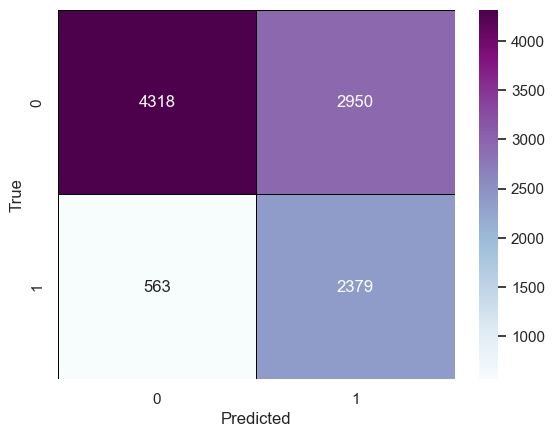

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      7268
           1       0.45      0.81      0.58      2942

    accuracy                           0.66     10210
   macro avg       0.67      0.70      0.64     10210
weighted avg       0.76      0.66      0.67     10210

Accuracy on the training set: 0.72
AUC: 0.797


In [78]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test,y_pred))

print("Accuracy on the training set: {:.2f}".format(dtc.score(X_blnc, y_blnc)))

y_proba = dtc.predict_proba(X_test)[:, 1]
# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

* <b><i>Random forest</i></b>

In [79]:
max_depth = [3,5,7,9]
rf_max_depth = None
best_f1 = 0

for d in max_depth:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("max_depth: ",d)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = d,random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_max_depth = d

print("Best hyperparameters: max_depth = {}".format(rf_max_depth))
print("Best f1-score: {}".format(best_f1))

max_depth:  3
Average accuracy of training data =  0.6924409595511234
Average accuracy test data =  0.6687365615923958
Average f1 =  0.5605615820432318 

max_depth:  5
Average accuracy of training data =  0.7149156874871876
Average accuracy test data =  0.6899523734555049
Average f1 =  0.5782956567520915 

max_depth:  7
Average accuracy of training data =  0.7397780526032539
Average accuracy test data =  0.6931257770385428
Average f1 =  0.5869096381879453 

max_depth:  9
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

Best hyperparameters: max_depth = 9
Best f1-score: 0.5911247204126486


In [80]:
n_estimators = [50, 100, 150,200]
rf_n_estimators = None
best_f1 = 0

for n in n_estimators:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("n_estimators: ",n)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = rf_max_depth, n_estimators = n, random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_n_estimators = n

print("Best hyperparameters: n_estimators = {}".format(rf_n_estimators))
print("Best f1-score: {}".format(best_f1))

n_estimators:  50
Average accuracy of training data =  0.7872340466395978
Average accuracy test data =  0.7007462966219528
Average f1 =  0.5899045911411495 

n_estimators:  100
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

n_estimators:  150
Average accuracy of training data =  0.7909642356814406
Average accuracy test data =  0.7002369632371966
Average f1 =  0.5921429284430186 

n_estimators:  200
Average accuracy of training data =  0.7919159258740037
Average accuracy test data =  0.700060607927038
Average f1 =  0.5925099133339813 

Best hyperparameters: n_estimators = 200
Best f1-score: 0.5925099133339813


In [81]:
criterion = ['gini', 'entropy', 'log_loss']
rf_criterion = None
best_f1 = 0

for c in criterion:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("criterion: ",c)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = rf_max_depth, criterion = c, random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_criterion = c

print("Best hyperparameters: criterion = {}".format(rf_criterion))
print("Best f1-score: {}".format(best_f1))

criterion:  gini
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

criterion:  entropy
Average accuracy of training data =  0.7841920941123656
Average accuracy test data =  0.700844180333287
Average f1 =  0.5934429338696868 

criterion:  log_loss
Average accuracy of training data =  0.7841920941123656
Average accuracy test data =  0.700844180333287
Average f1 =  0.5934429338696868 

Best hyperparameters: criterion = entropy
Best f1-score: 0.5934429338696868


In [82]:
bootstrap = [True, False]
rf_bootstrap = None
best_f1 = 0

for status in bootstrap:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("bootstrap: ",status)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = rf_max_depth, bootstrap = status, random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_bootstrap = status

print("Best hyperparameters: bootstrap = {}".format(rf_bootstrap))
print("Best f1-score: {}".format(best_f1))

bootstrap:  True
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

bootstrap:  False
Average accuracy of training data =  0.7945500467618238
Average accuracy test data =  0.700491561813533
Average f1 =  0.5923478673862462 

Best hyperparameters: bootstrap = False
Best f1-score: 0.5923478673862462


In [83]:
min_samples_split = range(2,11,2) 
rf_min_samples_split = None
best_f1 = 0

for m in min_samples_split:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("min_samples_split: ",m)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = rf_max_depth, min_samples_split = m, random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_min_samples_split = m

print("Best hyperparameters: min_samples_split = {}".format(rf_min_samples_split))
print("Best f1-score: {}".format(best_f1))

min_samples_split:  2
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

min_samples_split:  4
Average accuracy of training data =  0.7898766586497764
Average accuracy test data =  0.6995121068589112
Average f1 =  0.5919603764108293 

min_samples_split:  6
Average accuracy of training data =  0.7873020449337488
Average accuracy test data =  0.6997079356819553
Average f1 =  0.591044455815786 

min_samples_split:  8
Average accuracy of training data =  0.7872765751768449
Average accuracy test data =  0.7003544509372144
Average f1 =  0.5918849167167938 

min_samples_split:  10
Average accuracy of training data =  0.7842091348418535
Average accuracy test data =  0.6998647637538999
Average f1 =  0.5904007048616513 

Best hyperparameters: min_samples_split = 4
Best f1-score: 0.5919603764108293


In [84]:
min_samples_leaf = range(1,10,2)
rf_min_samples_leaf = None
best_f1 = 0

for m in min_samples_leaf:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("min_samples_leaf: ",m)
    for (train_idx, val_idx) in kf.split(X,y):
        # Split data into training and validation sets
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        rf = RandomForestClassifier(max_depth = rf_max_depth, min_samples_leaf = m, random_state = 2023)
        rf.fit(X_1, y_1)
        accuracy_train.append(rf.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(rf.score(X_1, y_1)))
        y_pred =rf.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        rf_min_samples_leaf = m

print("Best hyperparameters: min_samples_leaf = {}".format(rf_min_samples_leaf))
print("Best f1-score: {}".format(best_f1))

min_samples_leaf:  1
Average accuracy of training data =  0.7903099817071189
Average accuracy test data =  0.6993749863887839
Average f1 =  0.5911247204126486 

min_samples_leaf:  3
Average accuracy of training data =  0.7836313247958853
Average accuracy test data =  0.7002761117329499
Average f1 =  0.5919265989646916 

min_samples_leaf:  5
Average accuracy of training data =  0.7798161436626277
Average accuracy test data =  0.7004718407803835
Average f1 =  0.5905970033120969 

min_samples_leaf:  7
Average accuracy of training data =  0.7762558954815618
Average accuracy test data =  0.7000605753080883
Average f1 =  0.5928273218657463 

min_samples_leaf:  9
Average accuracy of training data =  0.772066812540683
Average accuracy test data =  0.6999627165406567
Average f1 =  0.5911771116863823 

Best hyperparameters: min_samples_leaf = 7
Best f1-score: 0.5928273218657463


In [85]:
print("Best setting of Random Forest")
print("max_depth: ", rf_max_depth)
print("criterion: ", rf_criterion)
print("min_samples_split: ", rf_min_samples_split)
print("n_estimators: ", rf_n_estimators)
print("min_samples_leaf: ", rf_min_samples_leaf)
print("bootstrap: ", rf_bootstrap)

Best setting of Random Forest
max_depth:  9
criterion:  entropy
min_samples_split:  4
n_estimators:  200
min_samples_leaf:  7
bootstrap:  False


In [86]:
rf = RandomForestClassifier(max_depth = rf_max_depth, criterion = rf_criterion,
                            min_samples_split = rf_min_samples_split, n_estimators = rf_n_estimators,
                            min_samples_leaf = rf_min_samples_leaf, bootstrap = rf_bootstrap,
                            random_state = 2023)

In [87]:
# using balanced data
rf.fit(X_blnc, y_blnc)
y_pred = rf.predict(X_test)
print(rf.score(X_blnc, y_blnc))

0.7831591469113773


<b>Feature importance</b>

                         importance
AgeHH1                     0.357186
IncomeGroup                0.124796
Homeownership              0.071858
HasCreditCard              0.068611
CurrentEquipmentDays       0.065132
MonthsInService            0.056352
MonthlyMinutes             0.023922
PercChangeMinutes          0.019032
RespondsToMailOffers       0.018651
TotalRecurringCharge       0.016463
MonthlyRevenue             0.012685
OverageMinutes             0.011447
ChildrenInHH               0.011268
PeakCallsInOut             0.009552
PercChangeRevenues         0.009475
OffPeakCallsInOut          0.009122
CreditRating               0.008978
ServiceArea                0.008640
ReceivedCalls              0.008146
UnansweredCalls            0.007381
InboundCalls               0.007062
OutboundCalls              0.006995
RetentionCalls             0.006484
DroppedBlockedCalls        0.006455
OwnsComputer               0.005801
DroppedCalls               0.005167
CustomerCareCalls          0

<Axes: ylabel='Columns'>

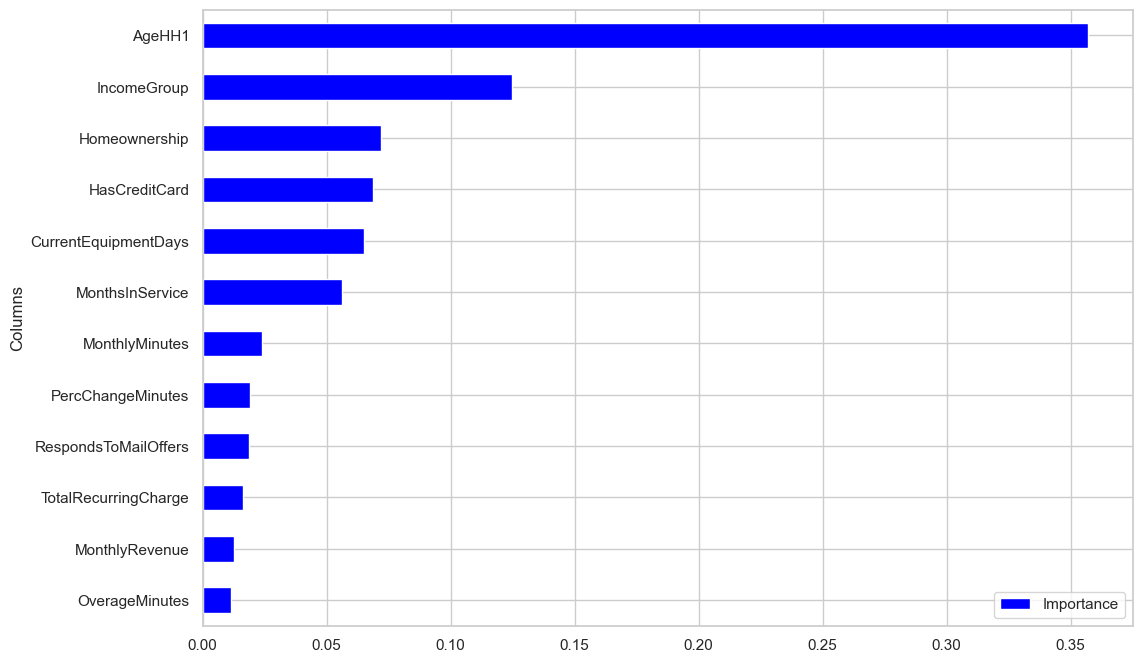

In [88]:
importance = rf.feature_importances_
importances=pd.DataFrame({"Columns":X_blnc.columns,"Importance":importance})
importances=importances.set_index("Columns")
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

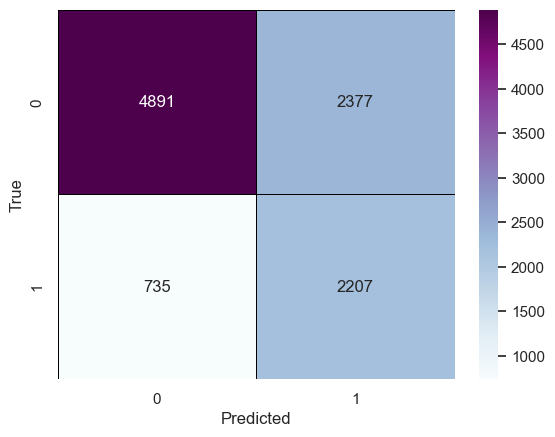

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7268
           1       0.48      0.75      0.59      2942

    accuracy                           0.70     10210
   macro avg       0.68      0.71      0.67     10210
weighted avg       0.76      0.70      0.71     10210

Accuracy on the training set: 0.78
AUC: 0.810


In [89]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy on the training set: {:.2f}".format(rf.score(X_blnc, y_blnc)))

y_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("AUC: {:.3f}".format(auc))

* <b><i>AdaBoost</i></b>


In [108]:
ada = AdaBoostClassifier(random_state = 2023)
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate' : [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=kf, scoring='f1',error_score=0)
grid_result_ada = grid_search.fit(X_blnc, y_blnc)

print("Best parameters: ", grid_result_ada.best_params_)
# print("Best f1: ", grid_result_ada.best_score_)

Best parameters:  {'learning_rate': 0.5, 'n_estimators': 200}


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

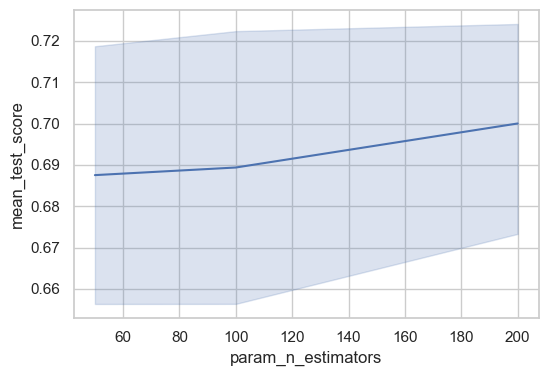

In [110]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(6, 4))

sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score',
             palette="Set1")

In [119]:
ada = AdaBoostClassifier(**grid_result_ada.best_params_, random_state = 2023)

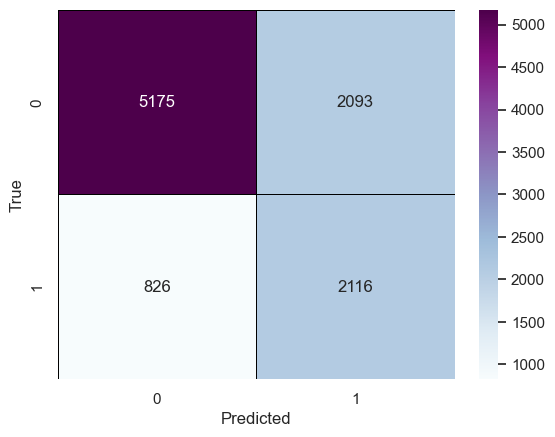

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      7268
           1       0.50      0.72      0.59      2942

    accuracy                           0.71     10210
   macro avg       0.68      0.72      0.69     10210
weighted avg       0.76      0.71      0.73     10210

Accuracy on the training set: 0.73
AUC: 0.803


In [120]:
# using balanced data
ada.fit(X_blnc, y_blnc)
y_pred = ada.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

train_accuracy = ada.score(X_blnc, y_blnc)

print("Accuracy on the training set: {:.2f}".format(train_accuracy))
y_proba = ada.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

* <b><i>XGBOOST</i></b>

In [93]:
max_depth = [3,4,5,6,7]
xgb_max_depth = None
best_f1 = 0

for d in max_depth:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("max_depth: ",d)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = d,random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_max_depth = d

print("Best hyperparameters: max_depth = {}".format(xgb_max_depth))
print("Best f1-score: {}".format(best_f1))

max_depth:  3
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

max_depth:  4
Average accuracy of training data =  0.814619989927334
Average accuracy test data =  0.7228632760419859
Average f1 =  0.6023620835468257 

max_depth:  5
Average accuracy of training data =  0.868839648851079
Average accuracy test data =  0.7192782788783955
Average f1 =  0.5968687195824126 

max_depth:  6
Average accuracy of training data =  0.9254469536192369
Average accuracy test data =  0.7144983939484557
Average f1 =  0.5914920413161605 

max_depth:  7
Average accuracy of training data =  0.9721552234641019
Average accuracy test data =  0.7129116509035593
Average f1 =  0.5891764053320897 

Best hyperparameters: max_depth = 3
Best f1-score: 0.6033505346802172


In [94]:
eta = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1]
xgb_eta = None
best_f1 = 0

for e in eta:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("eta: ",e)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(eta = e,random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_eta = e

print("Best hyperparameters: eta = {}".format(xgb_eta))
print("Best f1-score: {}".format(best_f1))

eta:  0.001
Average accuracy of training data =  0.7103527229556453
Average accuracy test data =  0.6609200999789991
Average f1 =  0.5768764291134596 

eta:  0.01
Average accuracy of training data =  0.7220617842944158
Average accuracy test data =  0.6752592750783838
Average f1 =  0.5823211714129619 

eta:  0.05
Average accuracy of training data =  0.7828241324224612
Average accuracy test data =  0.7177698174749115
Average f1 =  0.5999179404383954 

eta:  0.1
Average accuracy of training data =  0.8302716208957627
Average accuracy test data =  0.7233725864016012
Average f1 =  0.6031859278687934 

eta:  0.2
Average accuracy of training data =  0.8925804226256873
Average accuracy test data =  0.721354762831935
Average f1 =  0.600071256529906 

eta:  0.5
Average accuracy of training data =  0.9633863201029517
Average accuracy test data =  0.7068781007789309
Average f1 =  0.582173517672083 

eta:  1
Average accuracy of training data =  0.9925820999111666
Average accuracy test data =  0.693

In [95]:
colsample_bytree = [0.4, 0.5, 0.6, 0.7, 0.9, 1]
xgb_colsample_bytree = None
best_f1 = 0

for col in colsample_bytree:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("colsample_bytree: ",col)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = xgb_max_depth, colsample_bytree = col,random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_colsample_bytree = col

print("Best hyperparameters: colsample_bytree = {}".format(xgb_colsample_bytree))
print("Best f1-score: {}".format(best_f1))

colsample_bytree:  0.4
Average accuracy of training data =  0.7675294029660819
Average accuracy test data =  0.7242933425971151
Average f1 =  0.6051191402737446 

colsample_bytree:  0.5
Average accuracy of training data =  0.7700360248862667
Average accuracy test data =  0.7238427425091781
Average f1 =  0.6045032857715801 

colsample_bytree:  0.6
Average accuracy of training data =  0.7709961780418536
Average accuracy test data =  0.7224715454829518
Average f1 =  0.6029932306662439 

colsample_bytree:  0.7
Average accuracy of training data =  0.771726932985232
Average accuracy test data =  0.7241562374770816
Average f1 =  0.6045022288499967 

colsample_bytree:  0.9
Average accuracy of training data =  0.7727380747529532
Average accuracy test data =  0.7246459457667751
Average f1 =  0.6055688780998366 

colsample_bytree:  1
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

Best hyperparameters: col

In [113]:
gamma = [0, 0.1, 0.2, 0.5, 0.8, 1]
xgb_gamma = None
best_f1 = 0

for g in gamma:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("gamma: ",g)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = xgb_max_depth, gamma = g,random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_gamma = g

print("Best hyperparameters: gamma = {}".format(xgb_gamma))
print("Best f1-score: {}".format(best_f1))

gamma:  0
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

gamma:  0.1
Average accuracy of training data =  0.7735537849640014
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

gamma:  0.2
Average accuracy of training data =  0.7735537849640014
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

gamma:  0.5
Average accuracy of training data =  0.7733668531940974
Average accuracy test data =  0.7228436336780677
Average f1 =  0.6024581252921419 

gamma:  0.8
Average accuracy of training data =  0.7733668531940974
Average accuracy test data =  0.7228436336780677
Average f1 =  0.6024581252921419 

gamma:  1
Average accuracy of training data =  0.7733838469913614
Average accuracy test data =  0.7234901220706624
Average f1 =  0.6033149306077986 

Best hyperparameters: gamma = 0
Best f1-score: 0.6033505346802172


In [97]:
n_estimators = [50, 100, 150, 200, 250, 300]
xgb_n_estimators = None
best_f1 = 0

for n in n_estimators:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("n_estimators: ",n)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = xgb_max_depth, n_estimators = n,random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_n_estimators = n

print("Best hyperparameters: n_estimators = {}".format(xgb_n_estimators))
print("Best f1-score: {}".format(best_f1))

n_estimators:  50
Average accuracy of training data =  0.7516144569502695
Average accuracy test data =  0.7195722139891354
Average f1 =  0.6014004858446335 

n_estimators:  100
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

n_estimators:  150
Average accuracy of training data =  0.7898086574674886
Average accuracy test data =  0.7245087293585608
Average f1 =  0.6038784545186293 

n_estimators:  200
Average accuracy of training data =  0.8045425287971794
Average accuracy test data =  0.7243912359022578
Average f1 =  0.6032009258465789 

n_estimators:  250
Average accuracy of training data =  0.81846918103818
Average accuracy test data =  0.7238427348341311
Average f1 =  0.6022463925621265 

n_estimators:  300
Average accuracy of training data =  0.8295323358401785
Average accuracy test data =  0.7236468446107115
Average f1 =  0.6020328869705055 

Best hyperparameters: n_estimators = 150
Best f1-

In [98]:
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
xgb_subsample = None
best_f1 = 0

for s in subsample:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("subsample: ",s)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = xgb_max_depth, subsample = s, random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_subsample = s

print("Best hyperparameters: sub_sample = {}".format(xgb_subsample))
print("Best f1-score: {}".format(best_f1))

subsample:  0.5
Average accuracy of training data =  0.7692712693517444
Average accuracy test data =  0.7214135460165595
Average f1 =  0.6022609486208426 

subsample:  0.6
Average accuracy of training data =  0.7696367002539655
Average accuracy test data =  0.720473151294651
Average f1 =  0.6009421729706457 

subsample:  0.7
Average accuracy of training data =  0.7718799082080792
Average accuracy test data =  0.7228827629862034
Average f1 =  0.6040105536107323 

subsample:  0.8
Average accuracy of training data =  0.7717184100933683
Average accuracy test data =  0.7239014700497123
Average f1 =  0.603328365286162 

subsample:  0.9
Average accuracy of training data =  0.7724576619353786
Average accuracy test data =  0.7258213350763365
Average f1 =  0.6052700361627136 

subsample:  1
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

Best hyperparameters: sub_sample = 0.9
Best f1-score: 0.605270036162

In [99]:
min_child_weight = [0.5, 1, 1.5, 2]
xgb_min_child_weight = None
best_f1 = 0

for m in min_child_weight:
    f1 = []
    accuracy_test = []
    accuracy_train = []
    print("min_child_weight: ",m)
    for (train_idx, val_idx) in kf.split(X,y):
        X_train_1 = X.iloc[train_idx, :]
        y_train_1 = y.iloc[train_idx]
        X_test_1 = X.iloc[val_idx, :]
        y_test_1 = y.iloc[val_idx]
        undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 2023)
        X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
        
        xgb = XGBClassifier(max_depth = xgb_max_depth, min_child_weight = m, random_state = 2023)
        xgb.fit(X_1, y_1)
        accuracy_train.append(xgb.score(X_1, y_1))
#         print("Accuracy on the training set: {:.2f}".format(xgb.score(X_1, y_1)))
        y_pred =xgb.predict(X_test_1)
        f1.append(f1_score(y_test_1,y_pred))
        accuracy_test.append(accuracy_score(y_test_1,y_pred))
#       print(classification_report(y_test, y_pred))  

    avg_f1 = np.mean(f1)
    avg_acc = np.mean(accuracy_test)
    avg_acc_train = np.mean(accuracy_train)
    print("Average accuracy of training data = ", avg_acc_train)
    print("Average accuracy test data = ", avg_acc)
    print("Average f1 = ", avg_f1,'\n')
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        xgb_min_child_weight = m

print("Best hyperparameters: min_child_weight = {}".format(xgb_min_child_weight))
print("Best f1-score: {}".format(best_f1))

min_child_weight:  0.5
Average accuracy of training data =  0.773009968288835
Average accuracy test data =  0.7238819639178773
Average f1 =  0.6034386546961471 

min_child_weight:  1
Average accuracy of training data =  0.7735622818626334
Average accuracy test data =  0.7233725787265542
Average f1 =  0.6033505346802172 

min_child_weight:  1.5
Average accuracy of training data =  0.7736897230675318
Average accuracy test data =  0.724763498704692
Average f1 =  0.6047842838407482 

min_child_weight:  2
Average accuracy of training data =  0.7725596492681258
Average accuracy test data =  0.7259585169468394
Average f1 =  0.6064735404169834 

Best hyperparameters: min_child_weight = 2
Best f1-score: 0.6064735404169834


In [114]:
print("Best setting of XGBoost")
print("max_depth: ", xgb_max_depth)
print("eta: ", xgb_eta)
print("gamma: ", xgb_gamma)
print("n_estimators: ", xgb_n_estimators)
print("colsample_bytree: ",xgb_colsample_bytree)
print("subsample: ", xgb_subsample)
print("min_child_weight: ", xgb_min_child_weight)

Best setting of XGBoost
max_depth:  3
eta:  0.1
gamma:  0
n_estimators:  150
colsample_bytree:  0.9
subsample:  0.9
min_child_weight:  2


In [115]:
xgb = XGBClassifier(max_depth = xgb_max_depth, eta = xgb_eta, gamma = xgb_gamma,
                    n_estimators = xgb_n_estimators, colsample_bytree = xgb_colsample_bytree,
                    subsample = xgb_subsample, min_child_weight = xgb_min_child_weight,
                    random_state = 2023)

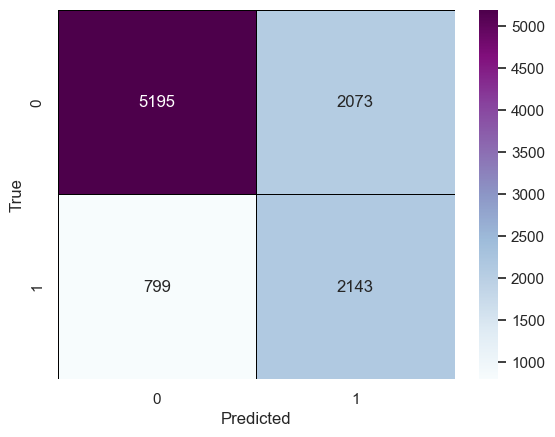

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7268
           1       0.51      0.73      0.60      2942

    accuracy                           0.72     10210
   macro avg       0.69      0.72      0.69     10210
weighted avg       0.76      0.72      0.73     10210

Accuracy on the training set: 0.75
AUC: 0.822


In [116]:
xgb.fit(X_blnc, y_blnc)
y_pred = xgb.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

train_accuracy = xgb.score(X_blnc, y_blnc)
print("Accuracy on the training set: {:.2f}".format(train_accuracy))

y_proba = xgb.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

In [117]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

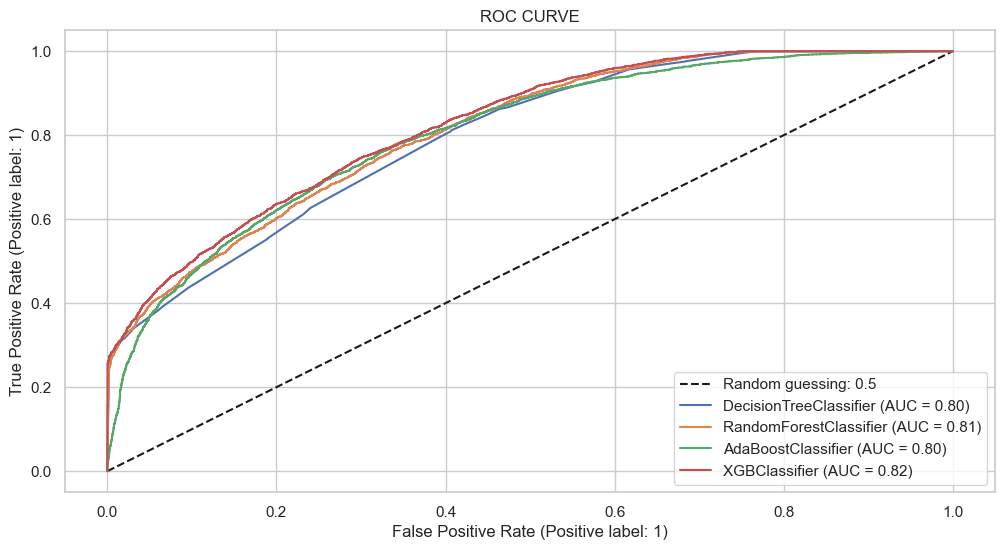

In [121]:
from sklearn.metrics import RocCurveDisplay

models = [dtc, rf, ada, xgb]

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()
for i in models:
    RocCurveDisplay.from_estimator(i, X_test, y_test,ax=ax)

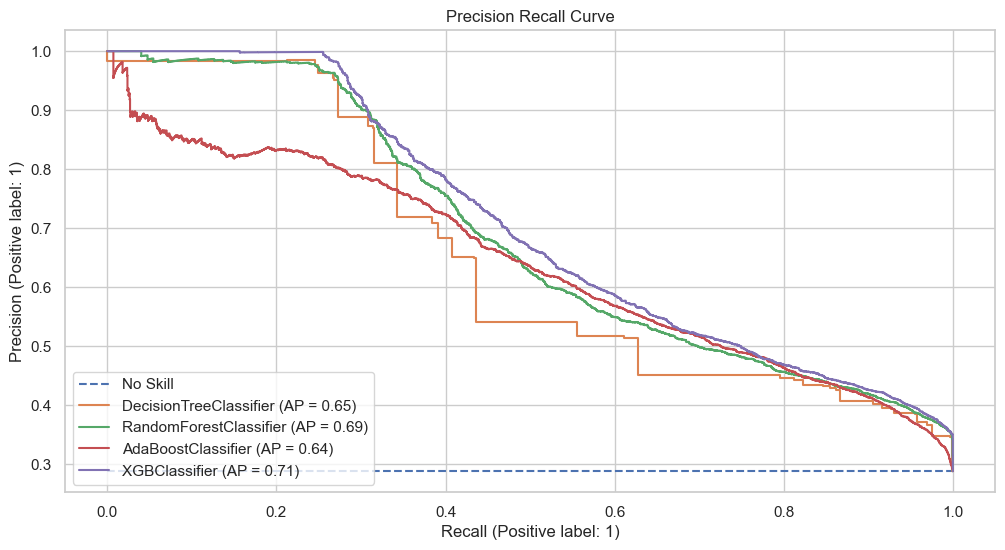

In [122]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

models = [dtc, rf, ada, xgb]

plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
    PrecisionRecallDisplay.from_estimator(i, X_test, y_test,ax=ax)

### Conclusion

<p>The benefits of accurately predicting churn and taking proactive measures to retain customers can be significant, including improved customer retention, increased revenue, and reduced costs associated with acquiring new customers.</p>

From the accuracy table according to the models and the graph of the positive class's accuracy, we assess that achieving high accuracy in predicting customer churn can be a costly process for businesses.

If the purpose of the company is to identify all customers who are likely to churn, then the focus should be on recall. However, if the goal is to identify customers who are truly likely to churn in order to implement effective retention strategies, then the focus should be on precision. And to balance both of them, we can focus on f1_score = 2recall*precision/(recall+precision)